<a href="https://colab.research.google.com/github/richardbigegapersonal/UT-Austin-Data-Science-and-Business-Analytics/blob/main/MT_Project_LearnerNotebook_FullCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Renewind #

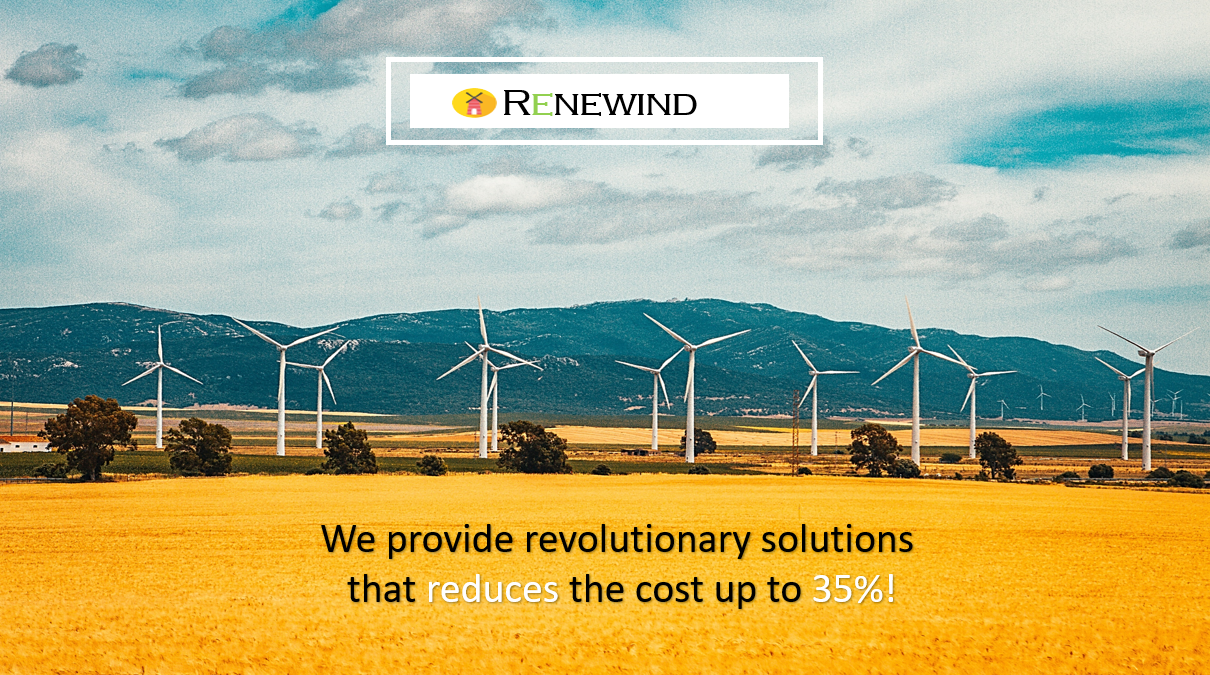

# ReneWind

Renewable energy sources play an increasingly important role in the global energy mix, as the effort to reduce the environmental impact of energy production increases.

Out of all the renewable energy alternatives, wind energy is one of the most developed technologies worldwide. The U.S Department of Energy has put together a guide to achieving operational efficiency using predictive maintenance practices.

Predictive maintenance uses sensor information and analysis methods to measure and predict degradation and future component capability. The idea behind predictive maintenance is that failure patterns are predictable and if component failure can be predicted accurately and the component is replaced before it fails, the costs of operation and maintenance will be much lower.

The sensors fitted across different machines involved in the process of energy generation collect data related to various environmental factors (temperature, humidity, wind speed, etc.) and additional features related to various parts of the wind turbine (gearbox, tower, blades, break, etc.). 



## Objective
“ReneWind” is a company working on improving the machinery/processes involved in the production of wind energy using machine learning and has collected data of generator failure of wind turbines using sensors. They have shared a ciphered version of the data, as the data collected through sensors is confidential (the type of data collected varies with companies). Data has 40 predictors, 40000 observations in the training set and 10000 in the test set.

The objective is to build various classification models, tune them, and find the best one that will help identify failures so that the generator could be repaired before failing/breaking to reduce the maintenance cost. The different costs associated with maintenance are as follows:

- `Replacement cost = $40,000`
- `Repair cost = $15,000`
- `Inspection cost = $5,000`

“1” in the target variables should be considered as “failure” and “0” will represent “No failure”.

## Data Description
- The data provided is a transformed version of original data which was collected using sensors.
- Train.csv - To be used for training and tuning of models. 
- Test.csv - To be used only for testing the performance of the final best model.
- Both the datasets consist of 40 predictor variables and 1 target variable


## 1. Importing libraries ##

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
)
from sklearn import metrics
from sklearn.model_selection import (
    train_test_split, 
    StratifiedKFold, 
    cross_val_score
)
from sklearn.preprocessing import (
    StandardScaler, 
    MinMaxScaler, 
    OneHotEncoder
)
from sklearn.impute import SimpleImputer

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)
pd.set_option("display.float_format", lambda x: "%.3f" % x)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
pd.set_option("display.float_format", lambda x: "%.3f" % x)

import warnings

warnings.filterwarnings("ignore")

## 2. Import training and testing data ##

In [2]:
from google.colab import files
import io
try:
   uploaded
except NameError:
  uploaded=files.upload()


Saving Test.csv to Test.csv
Saving Train.csv to Train.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['Train.csv'])) # Read training data

In [4]:
df_test = pd.read_csv(io.BytesIO(uploaded['Test.csv'])) # Read testing data

In [5]:
print("The training data set has ", df.shape[1], " columns ~ features and", df.shape[0], " rows")
print("The testing  data set has ", df_test.shape[1], " columns ~ features and", df_test.shape[0], " rows")

The training data set has  41  columns ~ features and 40000  rows
The testing  data set has  41  columns ~ features and 10000  rows


**Observation:** The testing set is 1/4 of the training set

## 3. Overall info about the data ##

In [6]:
# let's create a copy of the dataframes to avoid missing the data
data = df.copy()
data_test=df_test.copy()

3.1 Look at the few random rows of the training data

In [7]:
# let's view random 10 rows of the data
data.sample(n=10)

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
900   -1.113  0.852  0.588  0.621 -1.619 -1.058  1.395  1.590 -1.564 -1.126   
17755 -5.042 -6.821  0.829  0.410 -1.625 -2.713 -2.807  1.550 -1.935  4.136   
3600   2.125  2.169  0.964 -3.422 -1.723 -0.385  3.954  2.713 -3.675 -0.930   
39739 -0.382 -2.184  0.982  1.106 -1.104 -2.026 -1.750  2.652 -1.260  0.754   
9740  -3.927 -0.467 -0.960 -2.194  1.178  1.031 -2.774 -3.207  1.262 -1.040   
6579  -1.212  0.073  0.129  1.613 -0.528  1.689 -0.527 -3.223  0.483  1.684   
8663   5.385  2.600  8.506 -0.161 -3.222 -1.409 -0.013 -4.982  2.351  1.258   
4994   2.820 -3.736  4.825 -4.642 -2.651 -2.235 -0.432  2.130 -2.238  2.629   
6964   0.061 -4.661  5.776 -4.672 -2.445 -0.375 -2.421 -1.450 -1.943  4.486   
22082 -2.293  4.372 -0.114  2.141  1.826 -1.502  0.764  0.645 -0.568 -2.809   

         V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
900    2.277  5.583 -0.054 -1.996  1.179  1.751  1.069 -1.917  4.252  0.990   
17755 -4.634  3.126  2.836  2.468 -4.586 -2.084 -0.161  2.801  3.558  5.974   
3600   4.972  8.860 -0.729 -2.501  5.039  5.019 -1.290 -3.061  3.747 -3.391   
39739 -0.560  1.838  2.222  0.451 -3.205 -0.199 -0.829  0.153  2.348  0.987   
9740  -0.694  1.540  6.190 -0.749 -9.550 -5.895 -2.888  5.937 -2.449 -1.624   
6579   2.950 -3.318 -0.215 -0.523 -0.586 -1.076 -3.233 -1.459  1.934 -1.727   
8663  -1.320  0.897  3.716 -2.729 -1.725 -9.031 -3.709 -1.843  5.668 -1.346   
4994  -1.409  4.793  3.779  1.044 -0.761 -0.603 -3.819  0.641  1.816  0.255   
6964   0.938  1.497  6.063  0.837 -4.667 -2.536 -9.034  1.382  1.825 -2.331   
22082 -2.215  5.335 -0.457 -2.990 -1.708 -1.779  4.367  1.080  2.191 -0.396   

         V21    V22    V23    V24    V25    V26    V27    V28    V29    V30  \
900    0.088 -0.814 -0.243 -1.053 -0.836 -0.552 -1.266  0.729  2.966  2.533   
17755 -2.800  1.988  1.995  2.709 -0.208 -5.286  0.262  1.278 -4.219  0.845   
3600   1.382 -1.073  0.006 -2.280 -0.274  0.390  2.228 -0.570  4.048  1.560   
39739 -4.303  1.637  2.687  3.348 -1.627 -0.375 -2.685 -0.926  0.262  4.461   
9740  -5.634  3.063  3.471  0.912 -3.047  2.868 -2.296 -2.402 -0.706  2.703   
6579   0.362 -1.448 -3.549 -0.155 -1.495  0.733  0.496  0.403  1.690  1.470   
8663  -9.277  1.081 -7.340 -3.243  2.782  5.052  6.058 -1.961 -2.657 -3.790   
4994  -5.208  1.570 -0.485 -1.492  1.889 -1.013  5.250 -2.638 -2.038 -0.417   
6964  -6.675  0.461 -3.489 -1.408 -0.531  1.117  5.166 -4.075 -0.467  2.033   
22082 -1.608  1.276  3.177  4.050 -1.541  3.359 -5.409  0.829 -0.231  0.375   

         V31    V32    V33    V34    V35    V36    V37    V38    V39    V40  \
900   -3.300 -4.038 -0.740  3.505  1.019 -1.664  1.253  1.874  0.429 -0.299   
17755 -1.124  4.035 -2.700  4.477  2.876  6.081  1.297 -3.340  2.982 -5.220   
3600  -0.395 -6.741 -1.126  3.053  0.179 -0.370  1.155  3.427  0.376  2.948   
39739  1.448  7.120  2.681 -1.169  6.484 -0.069 -0.985 -3.901 -1.232 -2.696   
9740  -3.349  2.684  3.920 -3.600  1.170  1.499  1.593  0.962  2.472 -2.090   
6579  -0.858  0.409  4.062  1.176  1.573 -2.209 -1.963  3.330  0.262 -3.036   
8663   0.380 -8.136 -2.496  2.131  5.180  1.539 -2.082  1.745  2.257 -3.220   
4994   4.405 -1.108 -2.186  0.839  4.535  6.713  0.126 -4.667  1.724 -0.172   
6964   5.125  1.660  4.202 -0.175  7.101  6.845 -1.606 -2.887  2.925 -3.337   
22082 -2.998  0.472 -1.146  0.013 -0.296 -1.785  1.396  3.382  0.327  0.159   

       Target  
900         0  
17755       0  
3600        0  
39739       0  
9740        0  
6579        1  
8663        0  
4994        0  
6964        0  
22082       0

3.2 Look at the few random rows of the test data

In [8]:
# let's view random 10 rows of the data
data_test.sample(n=10) 

V1     V2     V3     V4     V5     V6     V7     V8     V9    V10  \
6709 -4.123 -4.070  5.491  3.946 -0.446 -7.159 -2.622  6.843  0.334 -0.657   
96    3.932  3.172 11.933 -3.783 -0.041  0.176 -0.519 -7.338  1.363  2.864   
330   0.769  1.630  5.594  3.248 -0.873 -2.315 -1.659 -1.881  1.340  0.297   
7085 -5.080 -3.183 -2.979  3.234  0.560 -1.751 -2.351  4.213 -1.887 -0.518   
4504 -0.703  0.138 -1.231 -1.090 -1.335 -0.113  2.335  1.758 -2.761 -0.338   
9752 -2.200 -1.215  1.287  0.967  1.583 -2.185 -1.644  3.474 -2.051  0.289   
7471 -2.207  4.973  1.171 -1.033  2.828  0.845 -0.787 -2.783  1.335 -3.755   
1669 -0.536  1.003  6.886  4.195 -1.740 -2.248 -2.666 -3.917  1.590  2.233   
538  -0.519 -0.524  2.410  3.847 -1.291 -2.769 -1.796 -0.049  2.254 -0.574   
4839 -3.249 -4.055  0.987 -0.017  1.618 -4.575 -4.293  5.494 -0.244 -1.593   

         V11    V12    V13    V14    V15    V16    V17    V18    V19    V20  \
6709 -10.205  2.679  2.856  2.789 -2.170  1.861  7.169 -0.515  0.683 12.519   
96    -4.352 -1.809  1.962 -2.616 -0.423 -9.205 -5.207  0.886  1.093 -4.243   
330   -4.095  0.036  1.113 -1.992 -2.940 -6.732  1.242 -0.144  4.434  1.683   
7085  -2.401  1.873 -1.377  0.670 -2.843  1.422  4.825  2.387  1.210  4.757   
4504   2.280  6.360 -2.508 -1.650  3.624  2.580  1.884 -0.818  3.699  0.420   
9752  -4.270  1.432 -0.903  0.492 -1.308  0.963  2.799  1.825 -0.225  1.689   
7471  -0.412  1.974  3.377 -3.246 -5.784 -4.050 -0.398  3.439 -2.690 -4.003   
1669  -2.306 -0.876  4.321 -1.938 -6.161 -8.201 -3.321 -1.292  6.759  0.203   
538   -4.308 -0.124  2.009 -0.085 -3.382 -4.666  3.107  0.017  2.786  5.400   
4839  -9.821  3.392  4.038  2.204 -7.778 -2.718  5.594  6.653 -3.422  6.782   

        V21    V22     V23    V24    V25    V26    V27    V28    V29    V30  \
6709 -1.097 -1.765  -0.146 -1.557  3.350 -2.244 -3.411  0.068 -4.962 -3.434   
96   -6.795 -1.242 -11.905 -3.220  4.507  8.018  8.397 -3.605 -4.363 -9.014   
330  -6.727  1.058  -3.292  2.297  0.963  3.316 -1.277 -0.197 -2.250 -0.962   
7085  0.062  1.469   5.572  6.197 -2.401 -4.033 -7.803  2.028  1.067  5.848   
4504  2.325 -0.108   0.888 -0.082 -0.132 -2.987  0.179  1.960  2.483  1.539   
9752 -1.095  0.626   2.593  5.359 -0.442  0.037 -4.404 -0.197 -1.191  1.279   
7471 -3.807  0.732   1.048  0.731 -2.388  7.483 -4.210 -2.818  1.223  0.838   
1669 -9.205  0.652  -5.024  2.130 -0.932  5.122 -0.494 -1.228 -2.219  0.586   
538  -4.436  1.238  -0.490  0.205  1.095 -0.114 -1.785  0.780 -2.732 -0.705   
4839 -6.063  4.320   8.043  5.162  0.358 -1.263 -6.278 -1.490 -4.972  1.225   

        V31    V32    V33    V34    V35    V36    V37     V38    V39    V40  \
6709  2.489  1.026 -9.025  3.710 -0.416  7.227  2.806 -12.676  1.690 -1.107   
96    7.051 -9.776 -1.981  0.115  1.278  8.436 -2.180   2.804  4.880  0.377   
330   0.347  0.025 -0.803  0.633  5.142  0.345 -1.433  -0.372  0.579 -3.260   
7085 -2.002  8.791  1.908 -0.336  3.094 -1.224  1.268  -3.129 -1.640 -1.574   
4504 -3.503 -5.193 -2.201  4.166 -1.018 -0.731  1.953   3.801  0.563  1.395   
9752  3.920  7.308  0.650 -1.870  2.670  2.727  0.034  -3.830 -0.680  0.330   
7471 -1.219 -0.216  3.726 -4.762 -0.475 -0.601  1.069   2.805  1.332  1.301   
1669  0.377  2.396  2.521  1.526  8.376  0.116 -3.213   0.475  1.595 -7.620   
538  -2.619 -0.142 -3.317  1.687  2.339 -0.212  0.316  -3.067  0.354 -3.298   
4839  2.112  9.588 -2.947 -4.444  2.834  6.096  2.942 -10.696  0.132  0.306   

      Target  
6709       0  
96         0  
330        0  
7085       0  
4504       0  
9752       0  
7471       0  
1669       0  
538        0  
4839       0

3.3 Summary info for training data, duplicates check and NaN values check

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 41 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      39954 non-null  float64
 1   V2      39961 non-null  float64
 2   V3      40000 non-null  float64
 3   V4      40000 non-null  float64
 4   V5      40000 non-null  float64
 5   V6      40000 non-null  float64
 6   V7      40000 non-null  float64
 7   V8      40000 non-null  float64
 8   V9      40000 non-null  float64
 9   V10     40000 non-null  float64
 10  V11     40000 non-null  float64
 11  V12     40000 non-null  float64
 12  V13     40000 non-null  float64
 13  V14     40000 non-null  float64
 14  V15     40000 non-null  float64
 15  V16     40000 non-null  float64
 16  V17     40000 non-null  float64
 17  V18     40000 non-null  float64
 18  V19     40000 non-null  float64
 19  V20     40000 non-null  float64
 20  V21     40000 non-null  float64
 21  V22     40000 non-null  float64
 22

**Observation:** All the values in the training set are of type float except the target field which is of type integer. It is appparent that v1 and v2 has null values since they don't have 40000 non nulls like the rest of the fields

In [10]:
# let's check for duplicate values in the data
data[data.duplicated()]

Empty DataFrame
Columns: [V1, V2, V3, V4, V5, V6, V7, V8, V9, V10, V11, V12, V13, V14, V15, V16, V17, V18, V19, V20, V21, V22, V23, V24, V25, V26, V27, V28, V29, V30, V31, V32, V33, V34, V35, V36, V37, V38, V39, V40, Target]
Index: []

**Observation:** There are not duplicates in the training dataset

In [11]:
#Let's check for full values
data.isnull().sum()

V1        46
V2        39
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [12]:
# let's check for missing values in the test data
data_test.isnull().sum()

V1        11
V2         7
V3         0
V4         0
V5         0
V6         0
V7         0
V8         0
V9         0
V10        0
V11        0
V12        0
V13        0
V14        0
V15        0
V16        0
V17        0
V18        0
V19        0
V20        0
V21        0
V22        0
V23        0
V24        0
V25        0
V26        0
V27        0
V28        0
V29        0
V30        0
V31        0
V32        0
V33        0
V34        0
V35        0
V36        0
V37        0
V38        0
V39        0
V40        0
Target     0
dtype: int64

In [13]:
# let's view the statistical summary of the numerical columns in the data
data.describe().T

count   mean   std     min    25%    50%    75%    max
V1     39954.000 -0.288 3.449 -13.502 -2.751 -0.774  1.837 17.437
V2     39961.000  0.443 3.139 -13.212 -1.638  0.464  2.538 13.089
V3     40000.000  2.506 3.406 -11.469  0.203  2.265  4.585 18.366
V4     40000.000 -0.066 3.437 -16.015 -2.350 -0.124  2.149 13.280
V5     40000.000 -0.045 2.107  -8.613 -1.507 -0.097  1.346  9.403
V6     40000.000 -1.001 2.037 -10.227 -2.363 -1.007  0.374  7.065
V7     40000.000 -0.893 1.757  -8.206 -2.037 -0.935  0.207  8.006
V8     40000.000 -0.563 3.299 -15.658 -2.660 -0.384  1.714 11.679
V9     40000.000 -0.008 2.162  -8.596 -1.494 -0.052  1.426  8.507
V10    40000.000 -0.002 2.183 -11.001 -1.391  0.106  1.486  8.108
V11    40000.000 -1.918 3.116 -14.832 -3.941 -1.942  0.089 13.852
V12    40000.000  1.578 2.915 -13.619 -0.431  1.485  3.541 15.754
V13    40000.000  1.591 2.865 -13.830 -0.209  1.654  3.476 15.420
V14    40000.000 -0.947 1.788  -8.309 -2.165 -0.957  0.266  6.213
V15    40000.000 -2.436 3.341 -17.202 -4.451 -2.399 -0.382 12.875
V16    40000.000 -2.943 4.212 -21.919 -5.632 -2.719 -0.113 13.583
V17    40000.000 -0.143 3.344 -17.634 -2.227 -0.028  2.072 17.405
V18    40000.000  1.189 2.586 -11.644 -0.403  0.867  2.564 13.180
V19    40000.000  1.181 3.395 -13.492 -1.051  1.278  3.497 16.059
V20    40000.000  0.027 3.675 -13.923 -2.434  0.030  2.513 16.052
V21    40000.000 -3.621 3.557 -19.436 -5.921 -3.559 -1.284 13.840
V22    40000.000  0.943 1.646 -10.122 -0.112  0.963  2.018  7.410
V23    40000.000 -0.388 4.052 -16.188 -3.119 -0.275  2.438 15.080
V24    40000.000  1.142 3.913 -18.488 -1.483  0.964  3.563 19.769
V25    40000.000 -0.003 2.025  -8.228 -1.373  0.021  1.400  8.223
V26    40000.000  1.896 3.421 -12.588 -0.319  1.964  4.163 16.836
V27    40000.000 -0.617 4.392 -14.905 -3.692 -0.910  2.201 21.595
V28    40000.000 -0.888 1.925  -9.685 -2.193 -0.905  0.377  6.907
V29    40000.000 -1.005 2.676 -12.579 -2.799 -1.206  0.604 11.852
V30    40000.000 -0.033 3.031 -14.796 -1.908  0.185  2.040 13.191
V31    40000.000  0.506 3.483 -19.377 -1.799  0.491  2.778 17.255
V32    40000.000  0.327 5.499 -23.201 -3.392  0.056  3.789 24.848
V33    40000.000  0.057 3.574 -17.454 -2.238 -0.050  2.256 16.692
V34    40000.000 -0.464 3.186 -17.985 -2.128 -0.251  1.433 14.358
V35    40000.000  2.235 2.924 -15.350  0.332  2.110  4.045 16.805
V36    40000.000  1.530 3.820 -17.479 -0.937  1.572  3.997 19.330
V37    40000.000 -0.000 1.778  -7.640 -1.266 -0.133  1.161  7.803
V38    40000.000 -0.351 3.964 -17.375 -3.017 -0.319  2.291 15.964
V39    40000.000  0.900 1.751  -7.136 -0.262  0.921  2.069  7.998
V40    40000.000 -0.897 2.998 -11.930 -2.950 -0.949  1.092 10.654
Target 40000.000  0.055 0.227   0.000  0.000  0.000  0.000  1.000

## 4. EDA ##

### 4.1 Univariate analysis ###

In [14]:
#function to plot a boxplot and a histogram along the same scale.
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Plotting histograms and boxplots for all the variables

a. Training data set

1 . Adjacent Histogram and Boxplot for:  V1
_______________________________________________


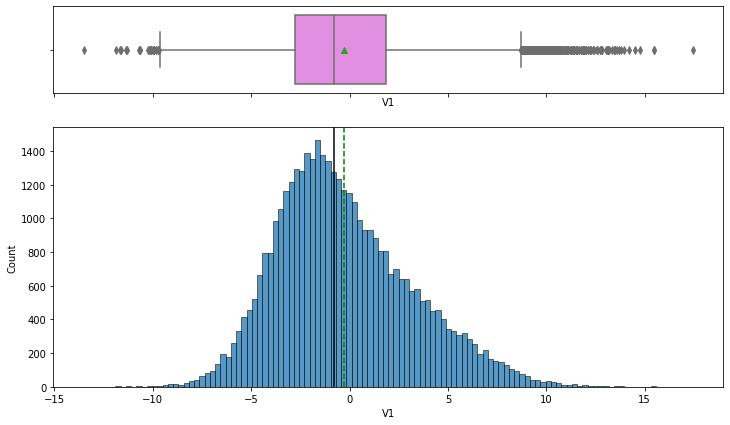

2 . Adjacent Histogram and Boxplot for:  V2
_______________________________________________


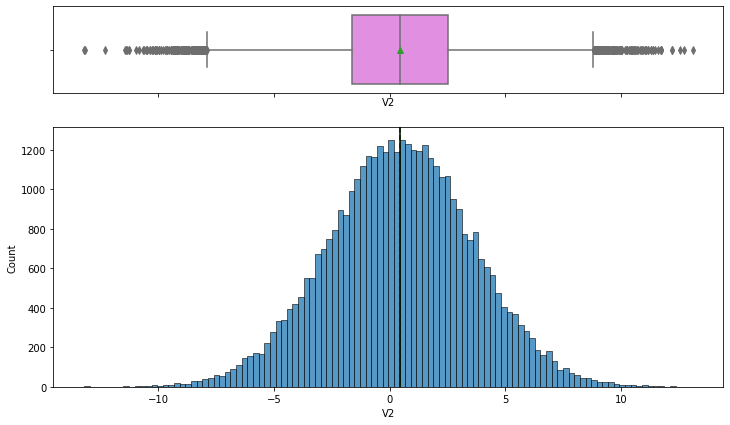

3 . Adjacent Histogram and Boxplot for:  V3
_______________________________________________


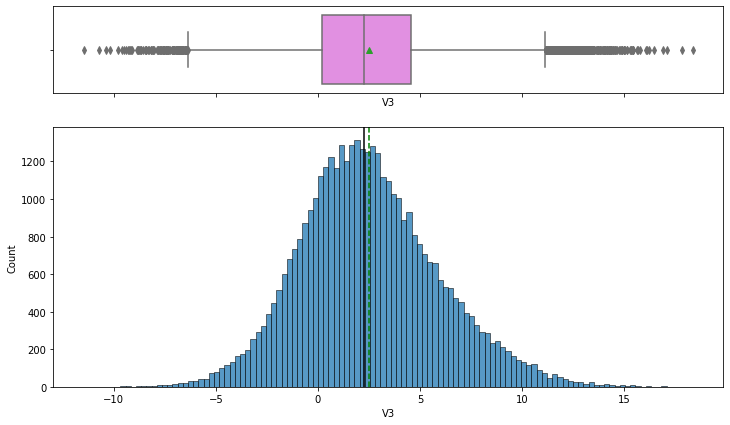

4 . Adjacent Histogram and Boxplot for:  V4
_______________________________________________


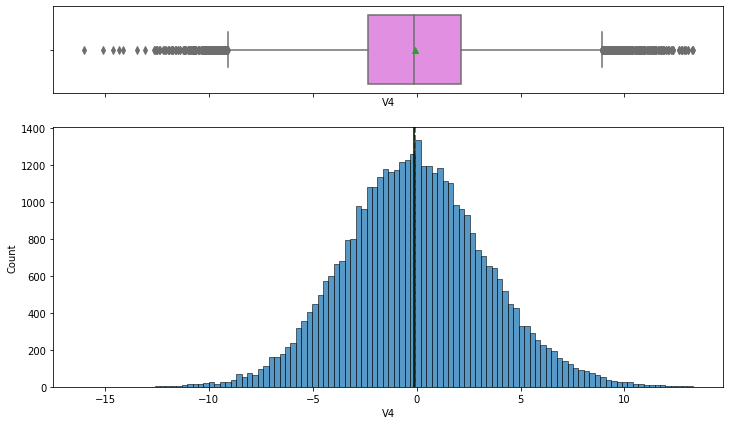

5 . Adjacent Histogram and Boxplot for:  V5
_______________________________________________


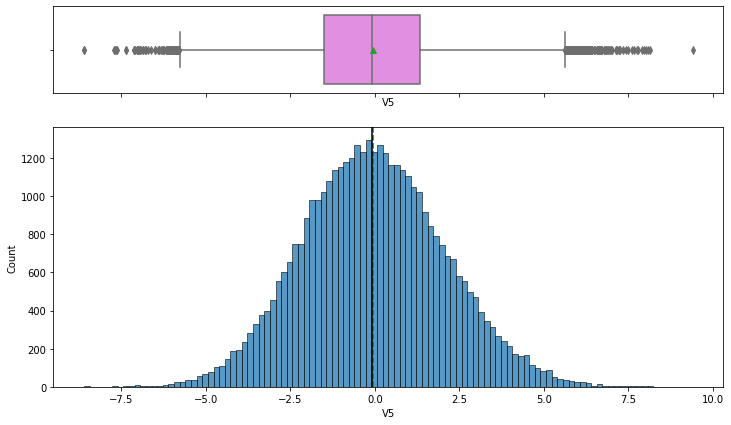

6 . Adjacent Histogram and Boxplot for:  V6
_______________________________________________


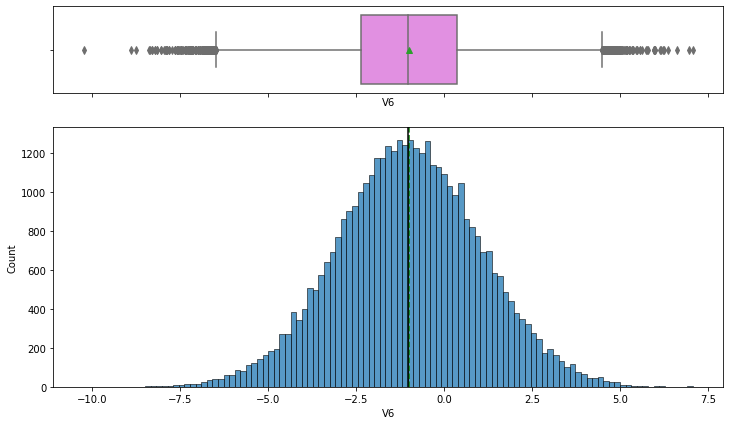

7 . Adjacent Histogram and Boxplot for:  V7
_______________________________________________


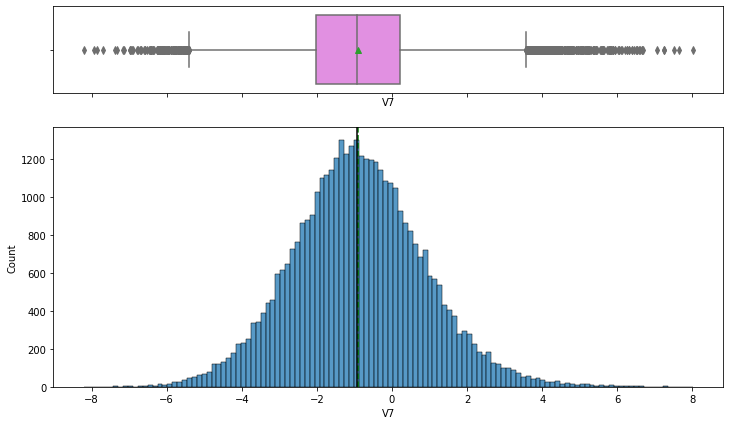

8 . Adjacent Histogram and Boxplot for:  V8
_______________________________________________


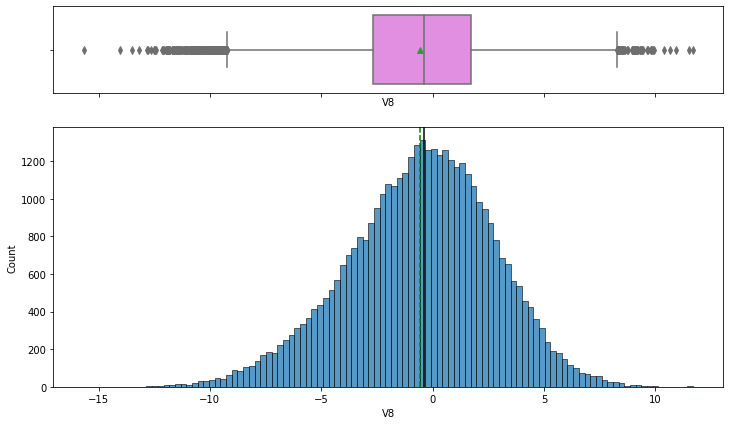

9 . Adjacent Histogram and Boxplot for:  V9
_______________________________________________


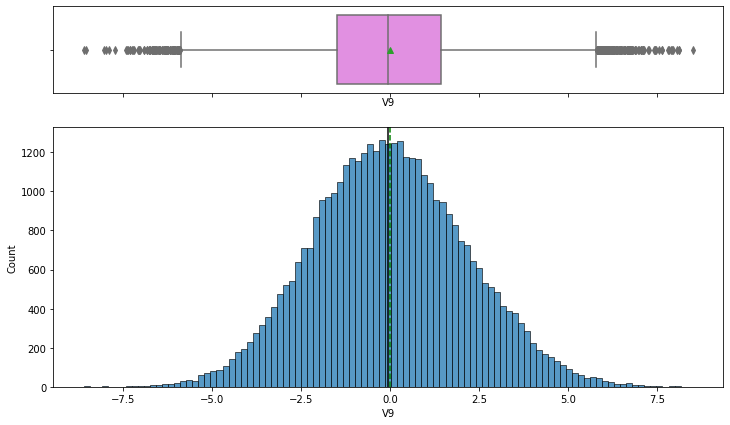

10 . Adjacent Histogram and Boxplot for:  V10
_______________________________________________


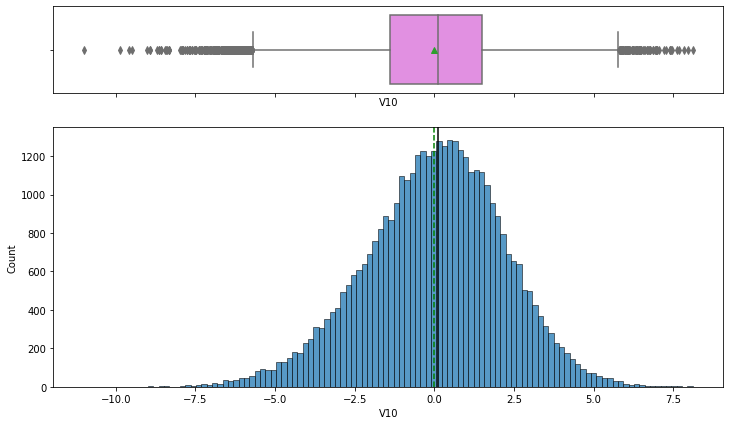

11 . Adjacent Histogram and Boxplot for:  V11
_______________________________________________


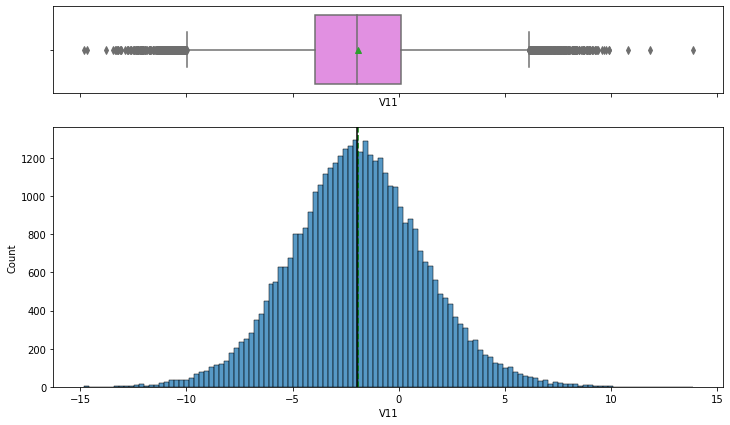

12 . Adjacent Histogram and Boxplot for:  V12
_______________________________________________


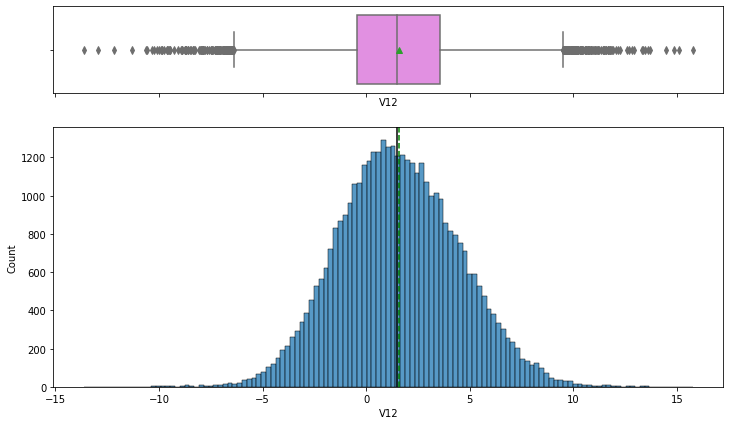

13 . Adjacent Histogram and Boxplot for:  V13
_______________________________________________


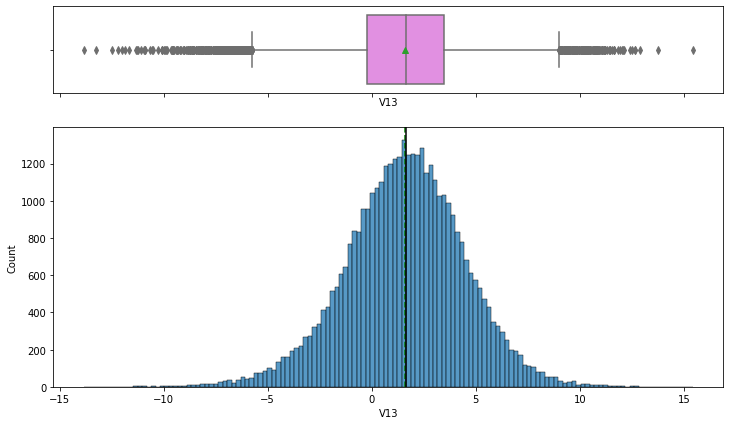

14 . Adjacent Histogram and Boxplot for:  V14
_______________________________________________


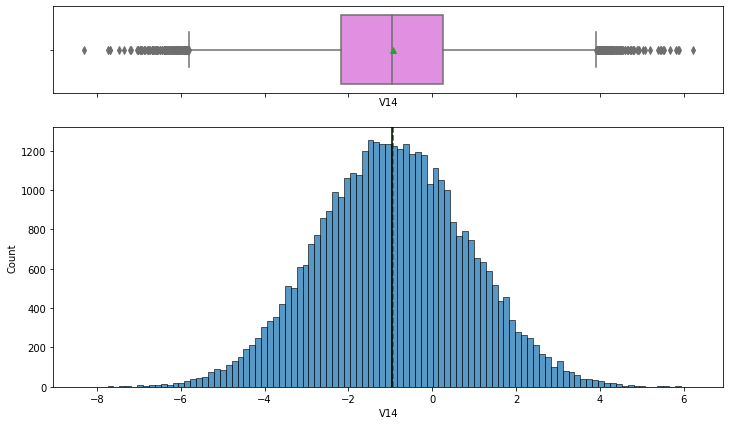

15 . Adjacent Histogram and Boxplot for:  V15
_______________________________________________


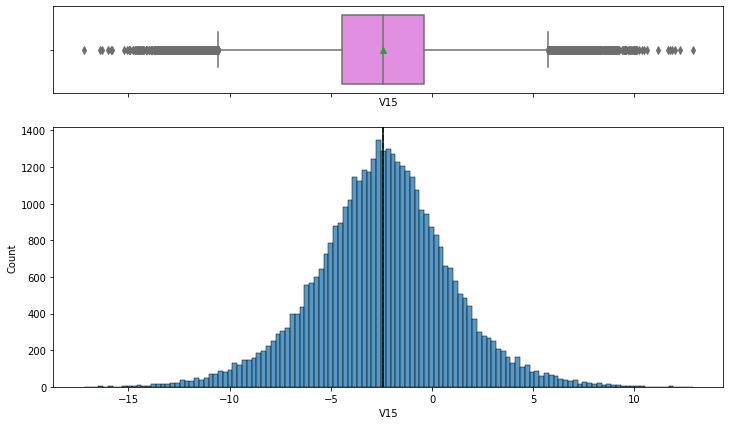

16 . Adjacent Histogram and Boxplot for:  V16
_______________________________________________


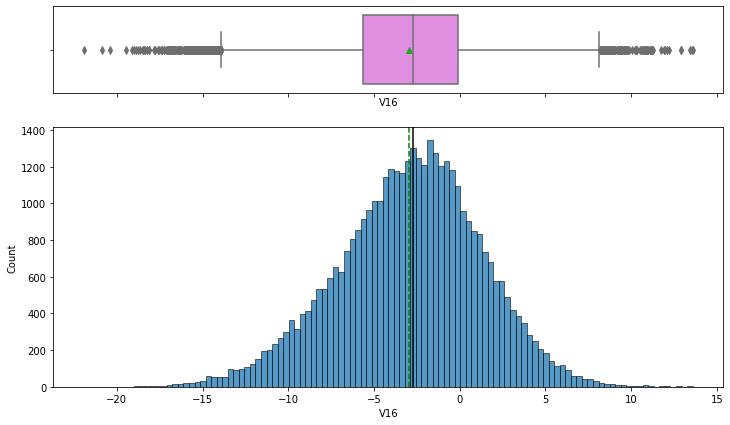

17 . Adjacent Histogram and Boxplot for:  V17
_______________________________________________


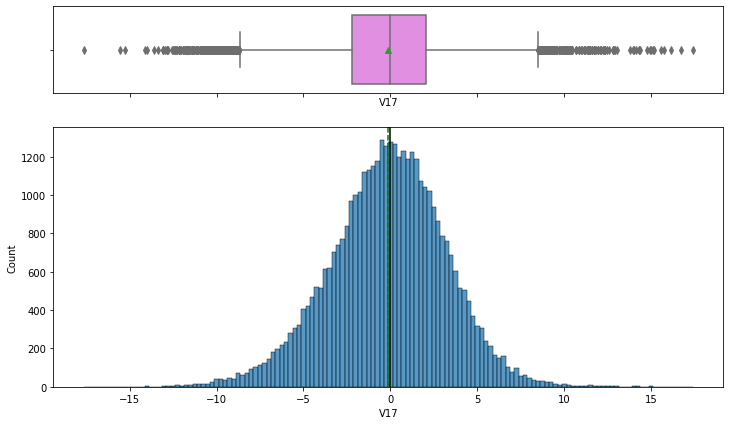

18 . Adjacent Histogram and Boxplot for:  V18
_______________________________________________


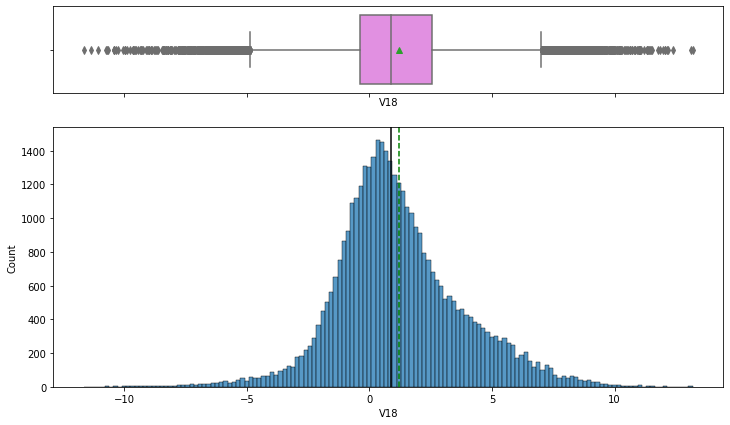

19 . Adjacent Histogram and Boxplot for:  V19
_______________________________________________


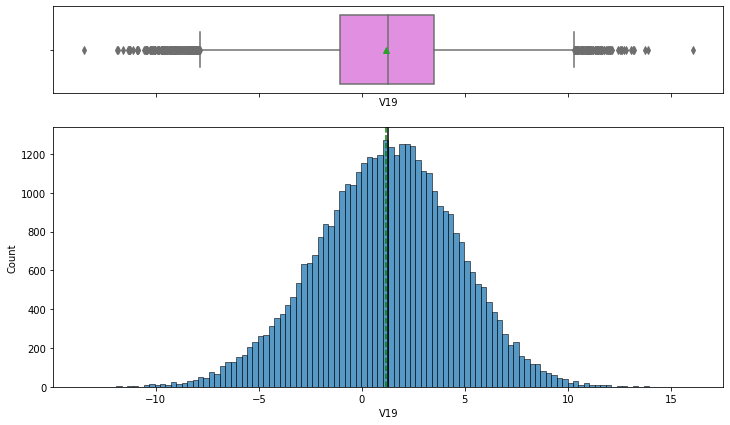

20 . Adjacent Histogram and Boxplot for:  V20
_______________________________________________


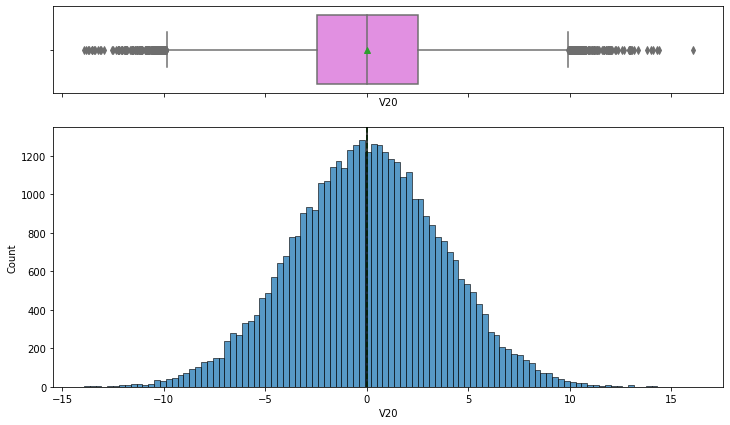

21 . Adjacent Histogram and Boxplot for:  V21
_______________________________________________


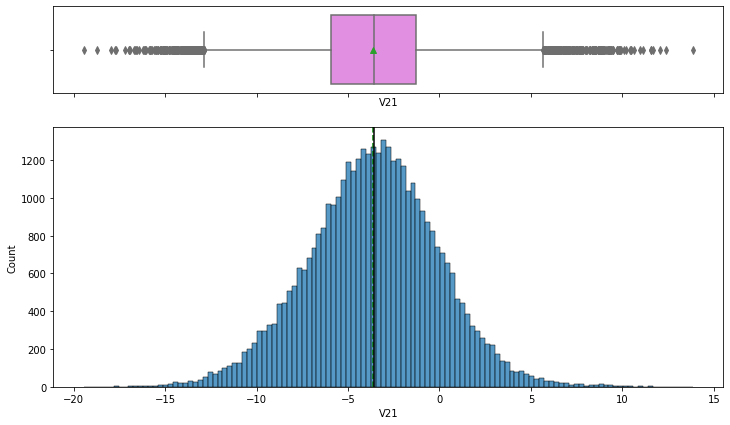

22 . Adjacent Histogram and Boxplot for:  V22
_______________________________________________


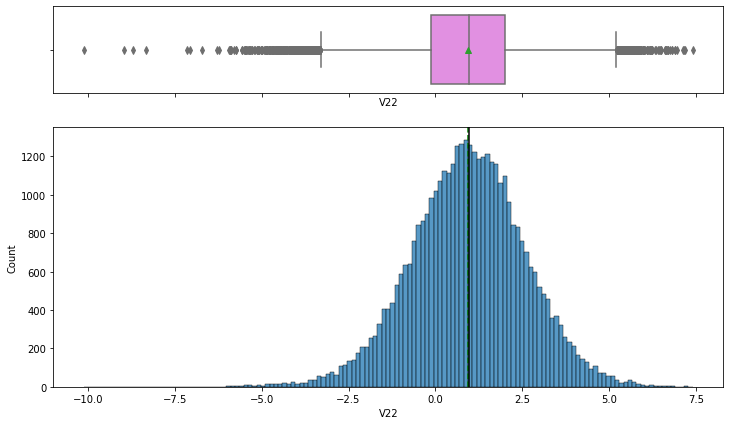

23 . Adjacent Histogram and Boxplot for:  V23
_______________________________________________


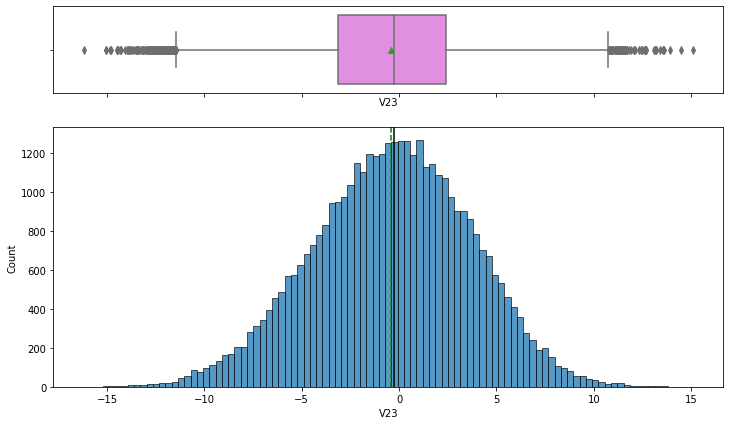

24 . Adjacent Histogram and Boxplot for:  V24
_______________________________________________


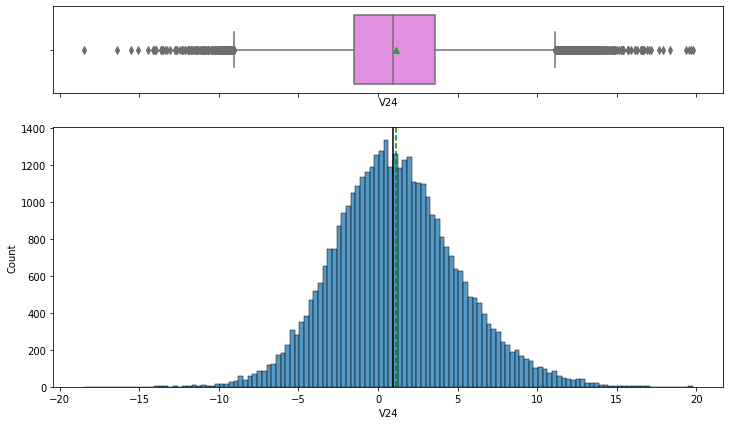

25 . Adjacent Histogram and Boxplot for:  V25
_______________________________________________


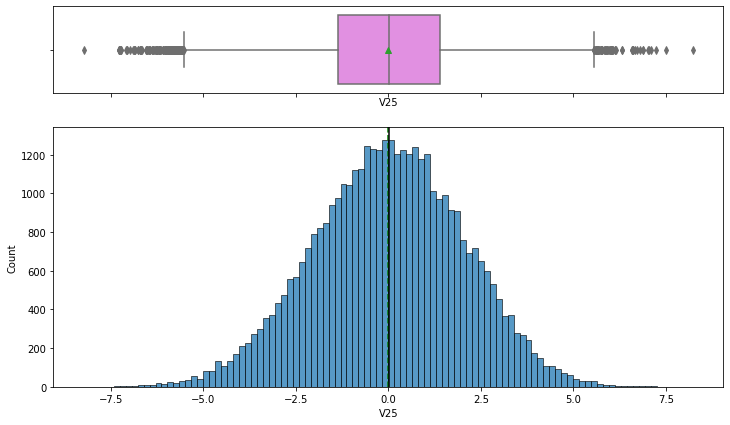

26 . Adjacent Histogram and Boxplot for:  V26
_______________________________________________


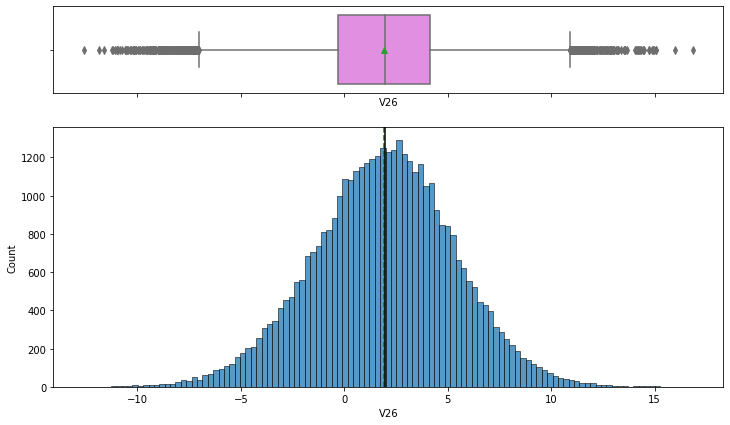

27 . Adjacent Histogram and Boxplot for:  V27
_______________________________________________


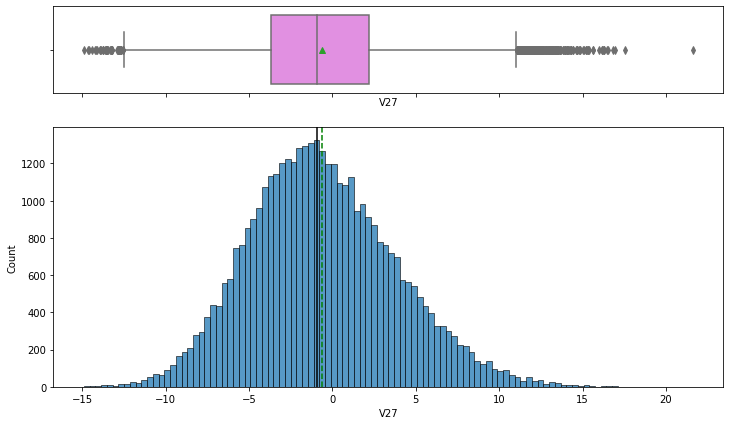

28 . Adjacent Histogram and Boxplot for:  V28
_______________________________________________


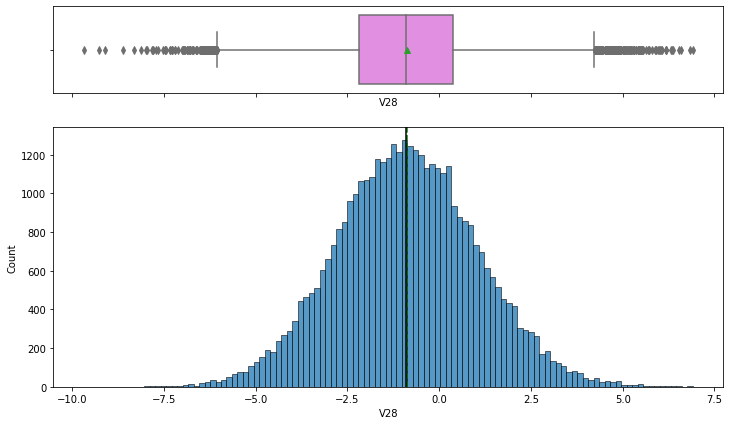

29 . Adjacent Histogram and Boxplot for:  V29
_______________________________________________


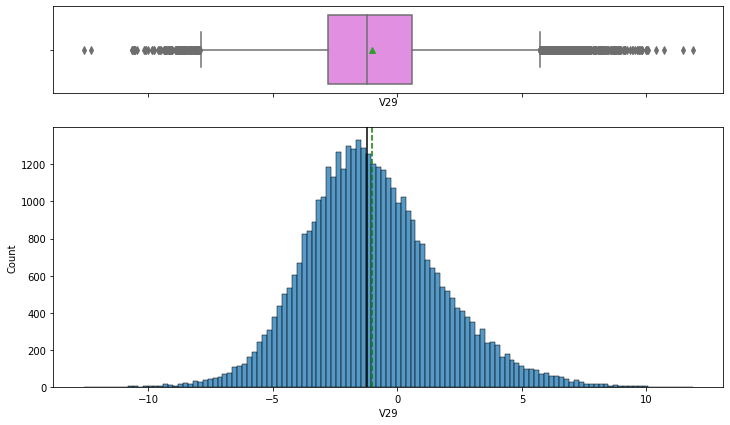

30 . Adjacent Histogram and Boxplot for:  V30
_______________________________________________


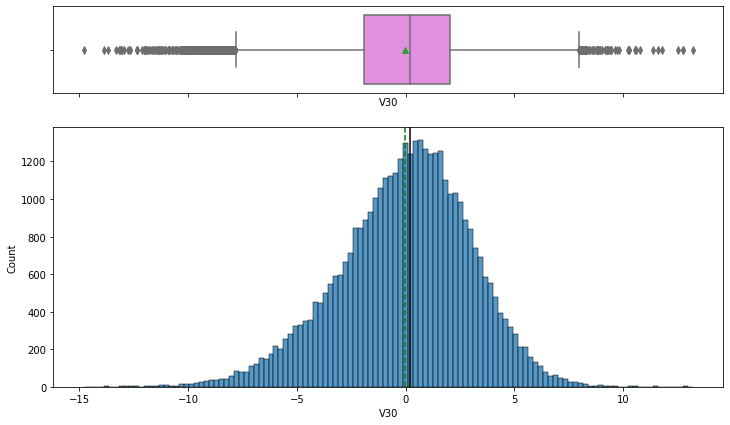

31 . Adjacent Histogram and Boxplot for:  V31
_______________________________________________


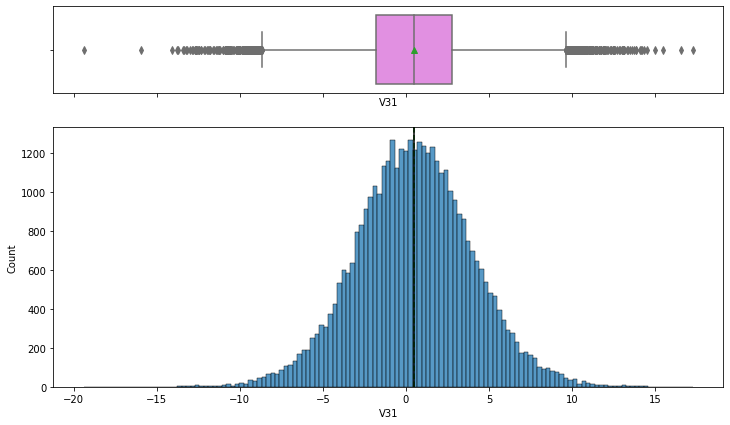

32 . Adjacent Histogram and Boxplot for:  V32
_______________________________________________


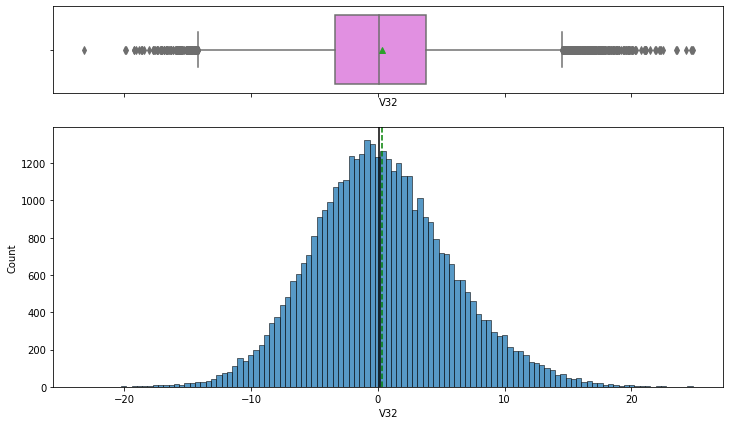

33 . Adjacent Histogram and Boxplot for:  V33
_______________________________________________


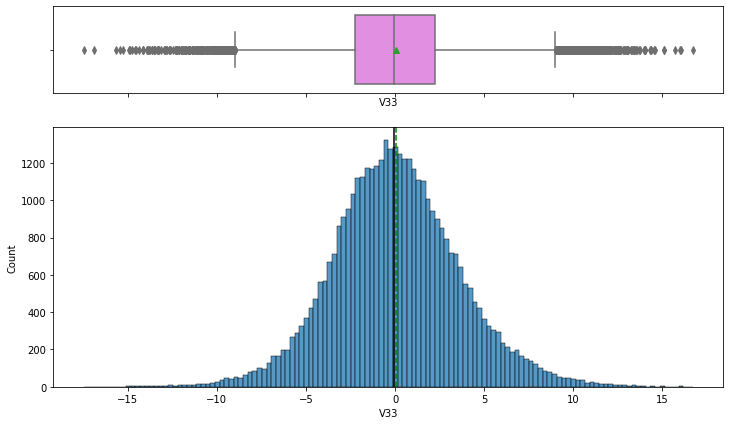

34 . Adjacent Histogram and Boxplot for:  V34
_______________________________________________


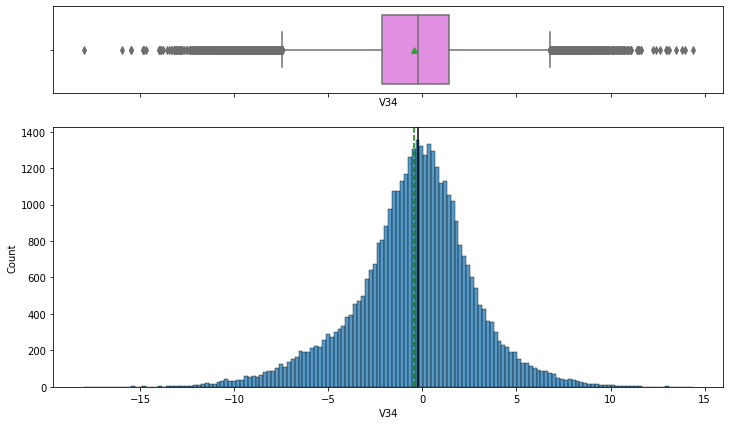

35 . Adjacent Histogram and Boxplot for:  V35
_______________________________________________


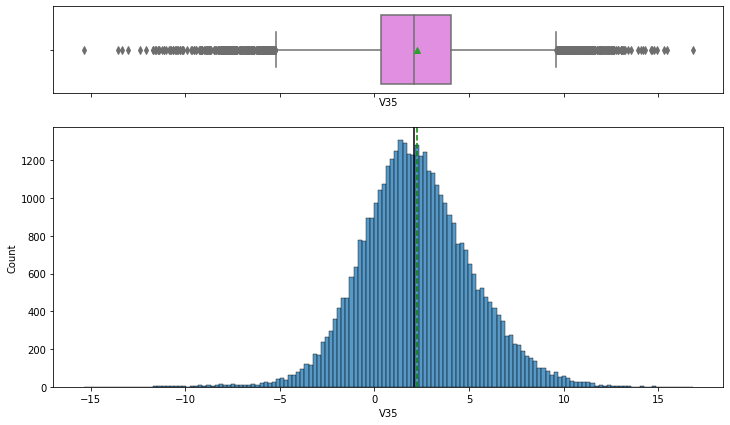

36 . Adjacent Histogram and Boxplot for:  V36
_______________________________________________


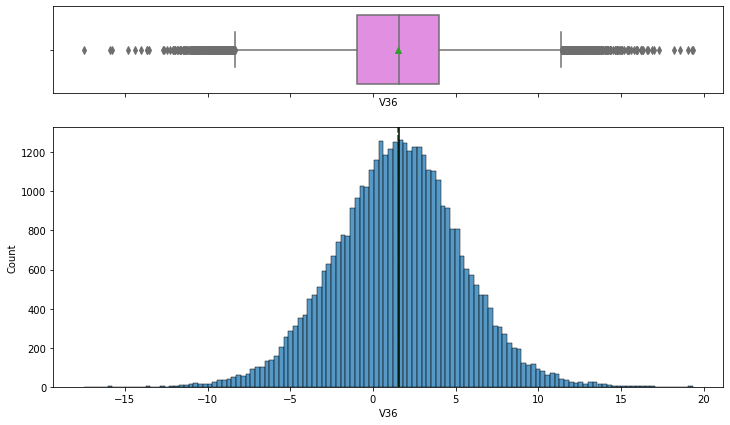

37 . Adjacent Histogram and Boxplot for:  V37
_______________________________________________


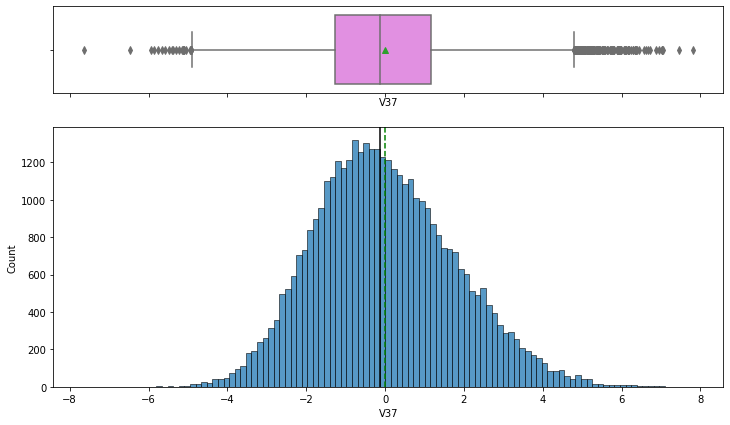

38 . Adjacent Histogram and Boxplot for:  V38
_______________________________________________


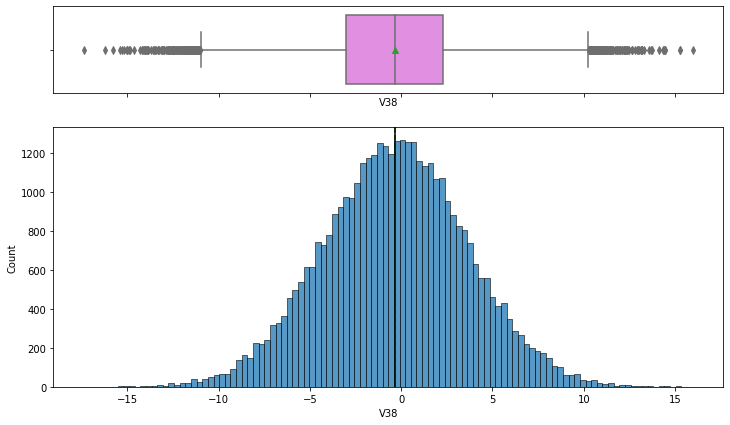

39 . Adjacent Histogram and Boxplot for:  V39
_______________________________________________


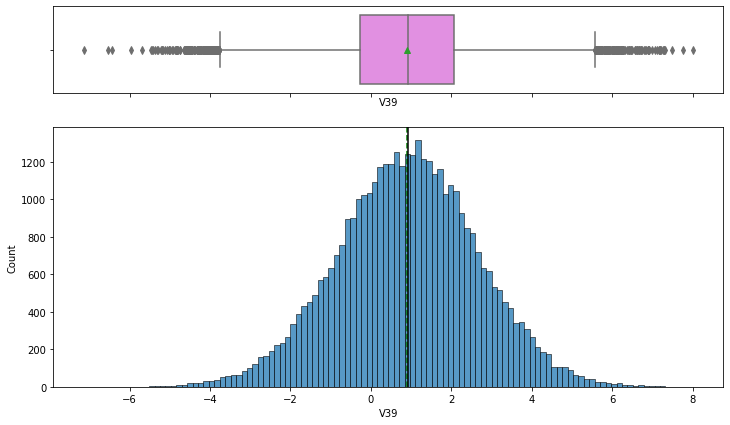

40 . Adjacent Histogram and Boxplot for:  V40
_______________________________________________


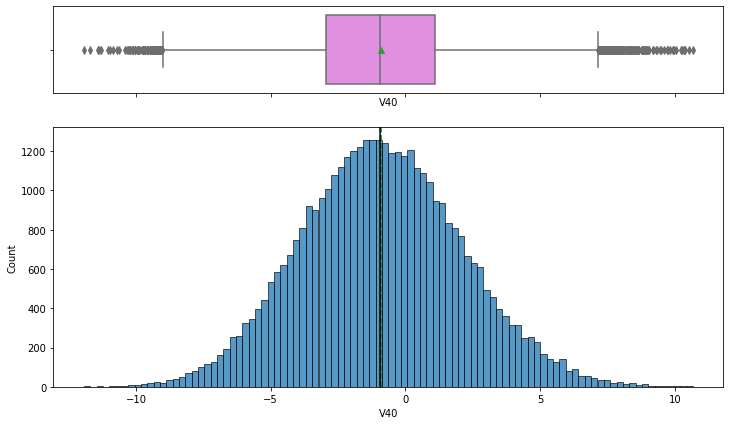

41 . Adjacent Histogram and Boxplot for:  Target
_______________________________________________


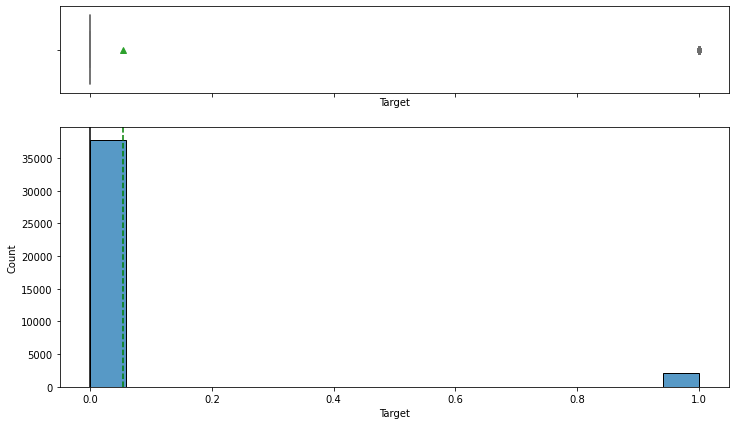

In [15]:
n=1 #initiates tne numerical position of the variable in the table
for i in data.columns:
    print( n ,". Adjacent Histogram and Boxplot for: ", i)
    print("_______________________________________________")
    histogram_boxplot(data, i, figsize=(12, 7), kde=False, bins=None)
    n=n+1
    plt.show()

**Observations:**
* All but the traget variable have a quasi-normal distribution; with the majority centered around zero
* The target variable is haved biased towards zero, whith the zero count>30 thousands while the 1 count is approx. 2 thousands

Testing dataset 

1 . Adjacent Histogram and Boxplot for:  V1
_______________________________________________


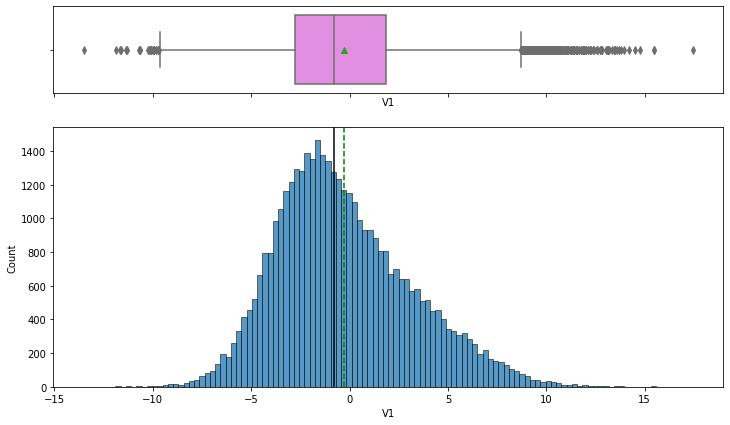

2 . Adjacent Histogram and Boxplot for:  V2
_______________________________________________


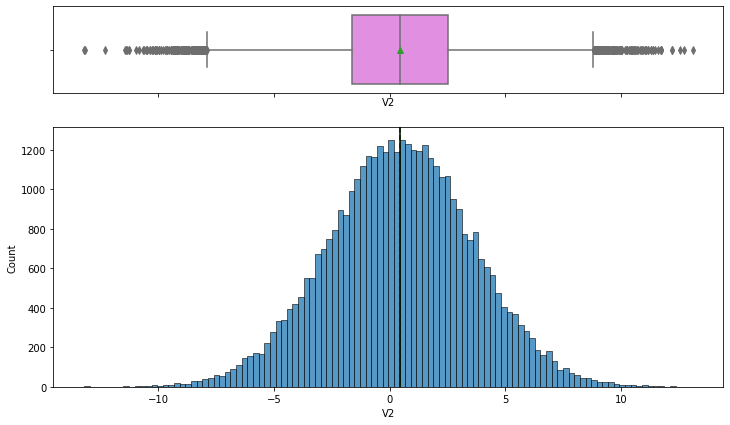

3 . Adjacent Histogram and Boxplot for:  V3
_______________________________________________


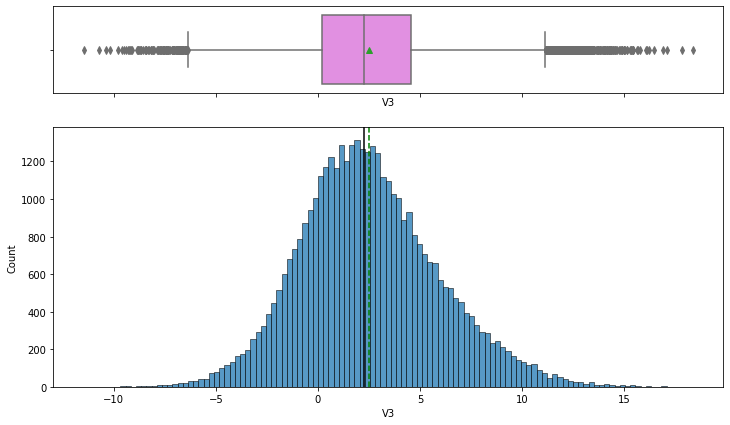

4 . Adjacent Histogram and Boxplot for:  V4
_______________________________________________


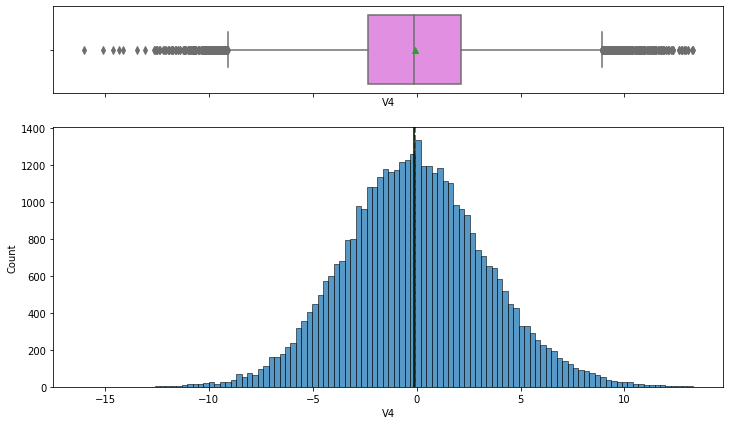

5 . Adjacent Histogram and Boxplot for:  V5
_______________________________________________


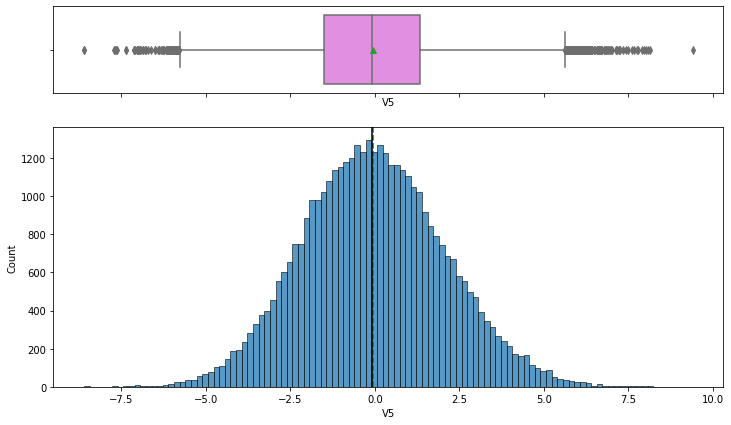

6 . Adjacent Histogram and Boxplot for:  V6
_______________________________________________


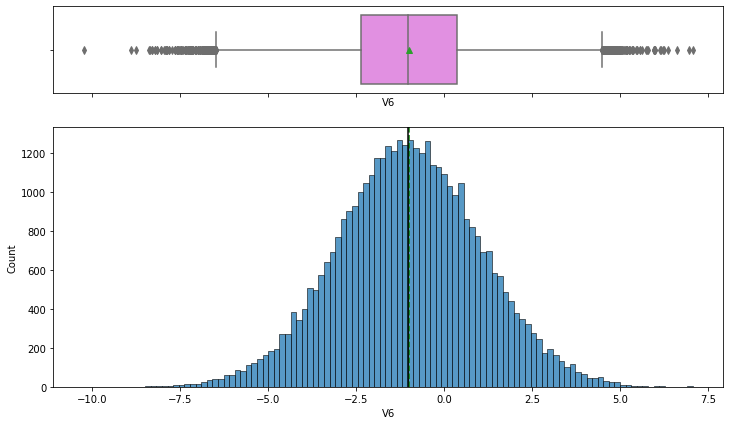

7 . Adjacent Histogram and Boxplot for:  V7
_______________________________________________


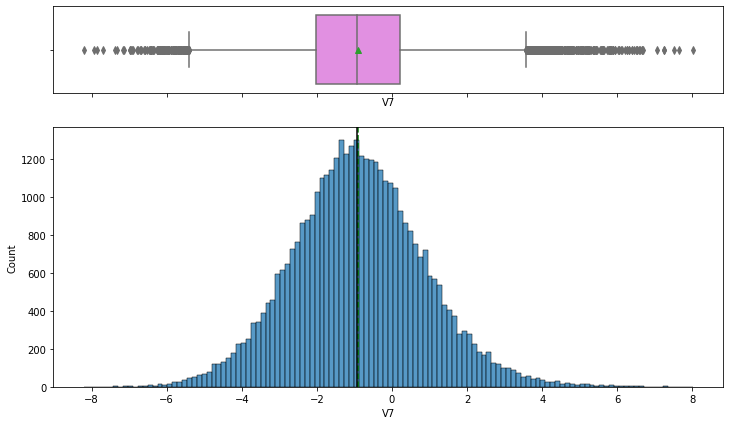

8 . Adjacent Histogram and Boxplot for:  V8
_______________________________________________


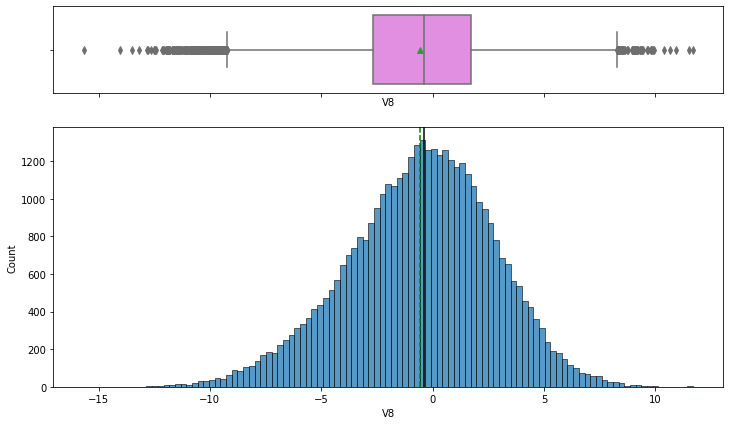

9 . Adjacent Histogram and Boxplot for:  V9
_______________________________________________


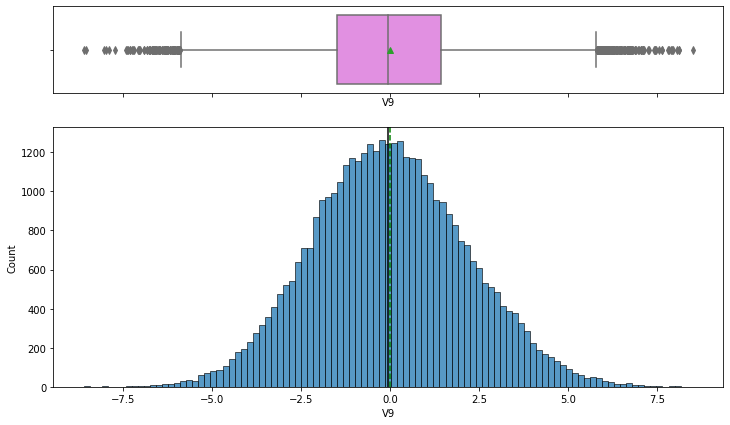

10 . Adjacent Histogram and Boxplot for:  V10
_______________________________________________


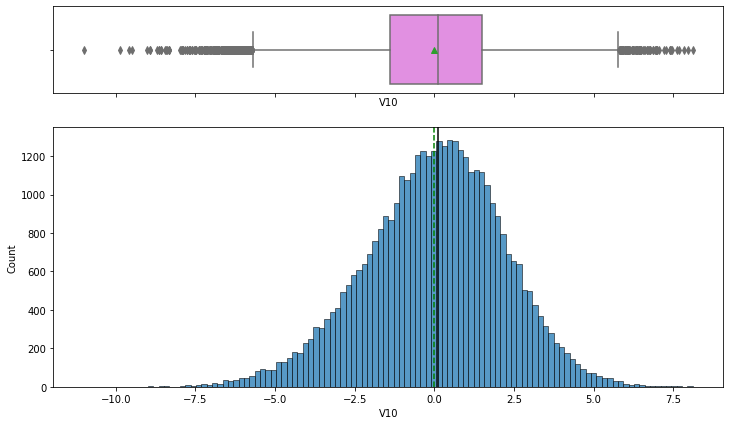

11 . Adjacent Histogram and Boxplot for:  V11
_______________________________________________


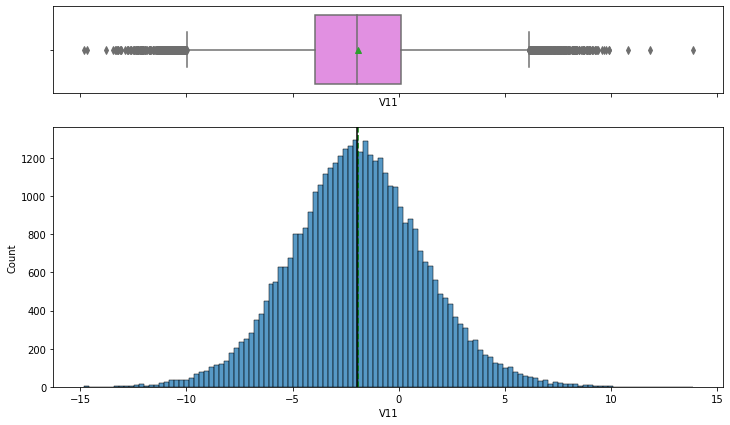

12 . Adjacent Histogram and Boxplot for:  V12
_______________________________________________


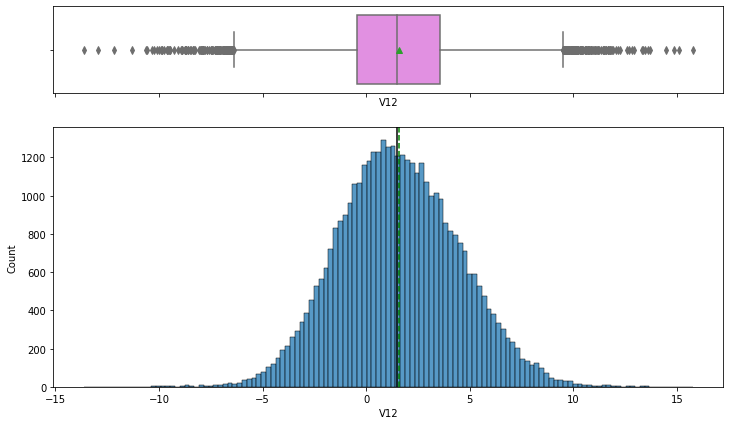

13 . Adjacent Histogram and Boxplot for:  V13
_______________________________________________


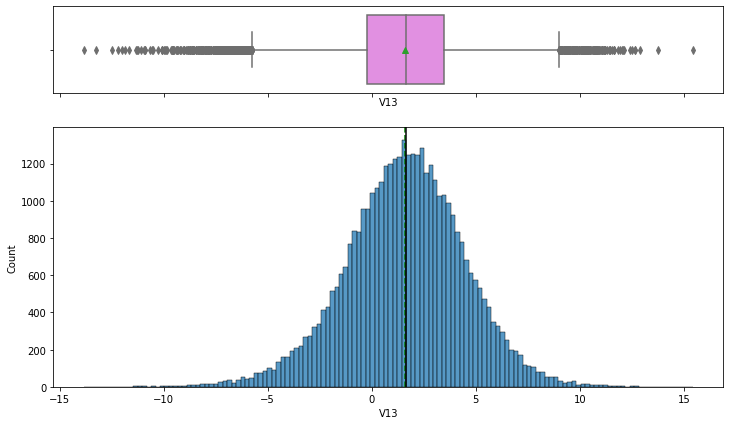

14 . Adjacent Histogram and Boxplot for:  V14
_______________________________________________


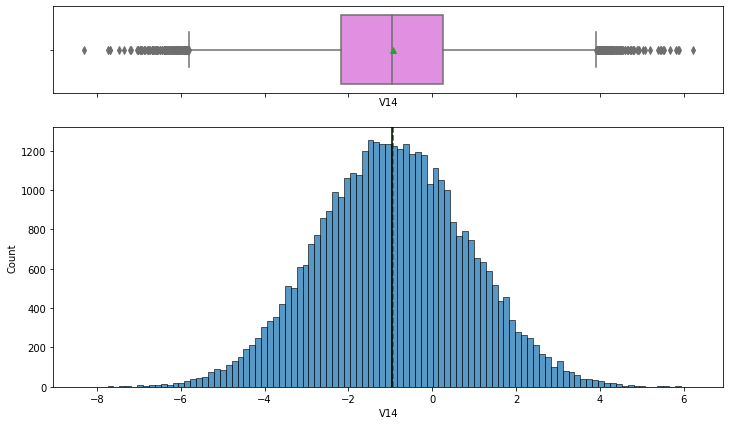

15 . Adjacent Histogram and Boxplot for:  V15
_______________________________________________


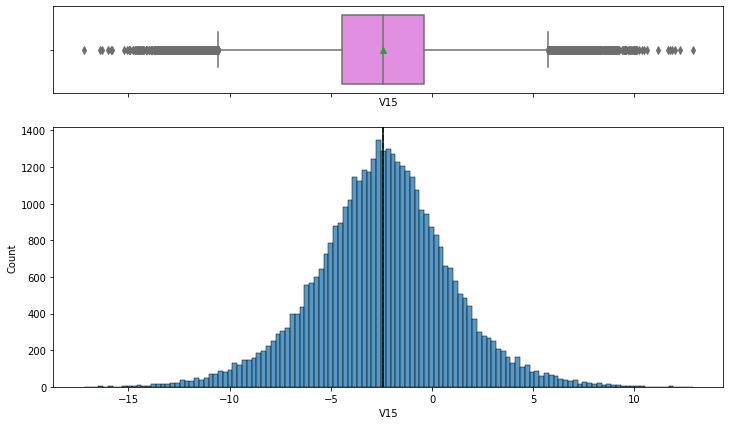

16 . Adjacent Histogram and Boxplot for:  V16
_______________________________________________


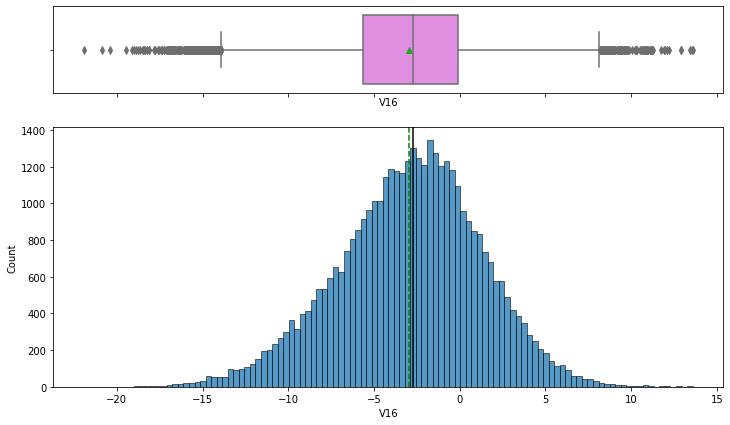

17 . Adjacent Histogram and Boxplot for:  V17
_______________________________________________


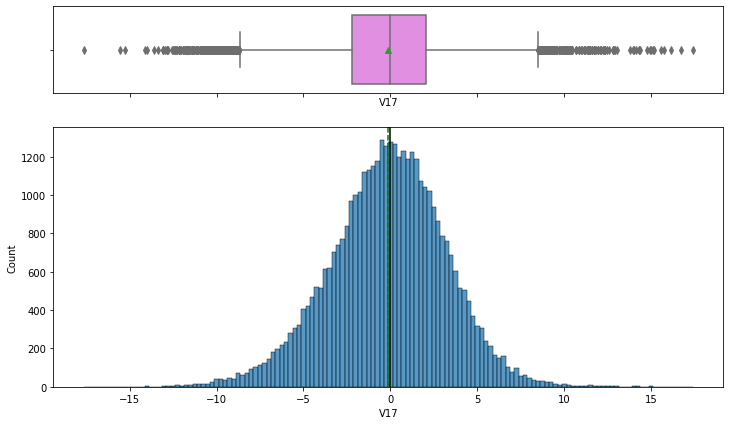

18 . Adjacent Histogram and Boxplot for:  V18
_______________________________________________


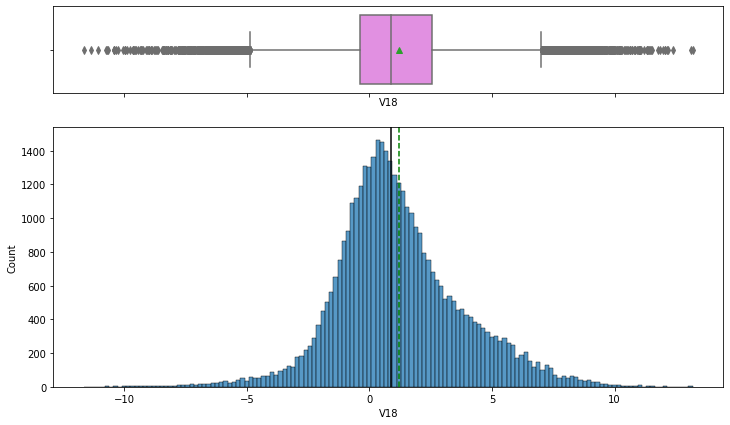

19 . Adjacent Histogram and Boxplot for:  V19
_______________________________________________


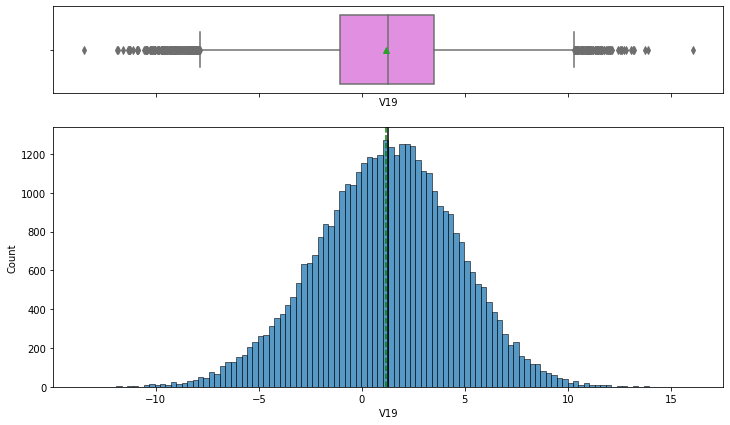

20 . Adjacent Histogram and Boxplot for:  V20
_______________________________________________


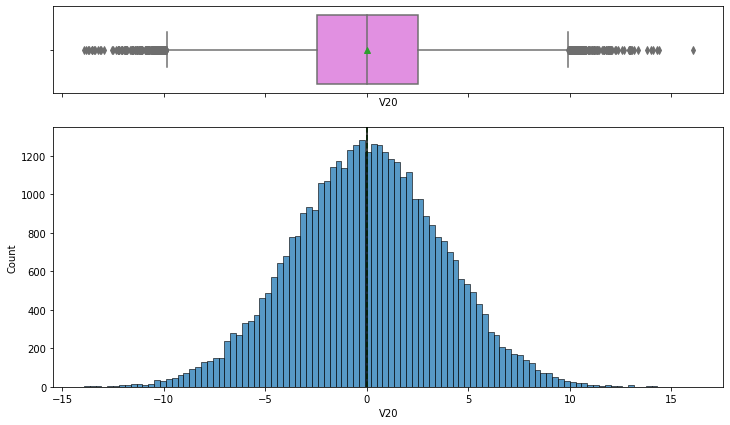

21 . Adjacent Histogram and Boxplot for:  V21
_______________________________________________


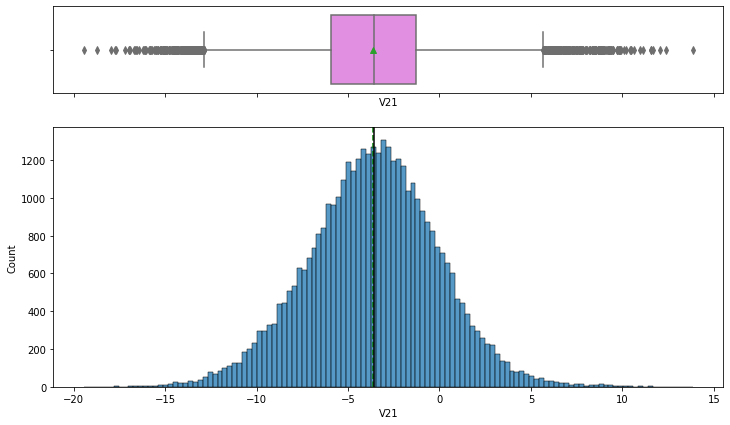

22 . Adjacent Histogram and Boxplot for:  V22
_______________________________________________


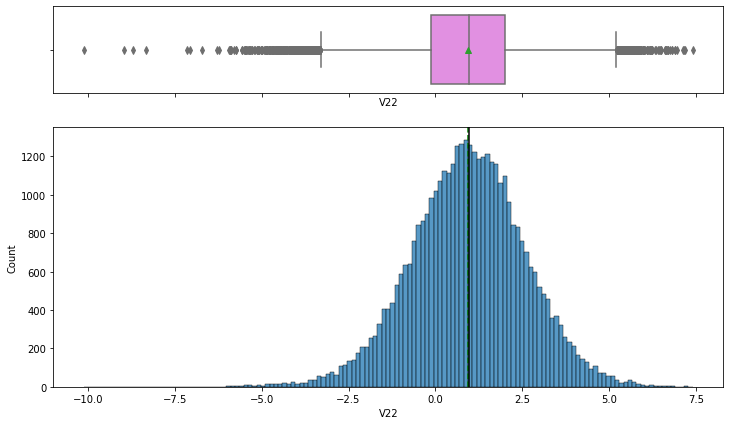

23 . Adjacent Histogram and Boxplot for:  V23
_______________________________________________


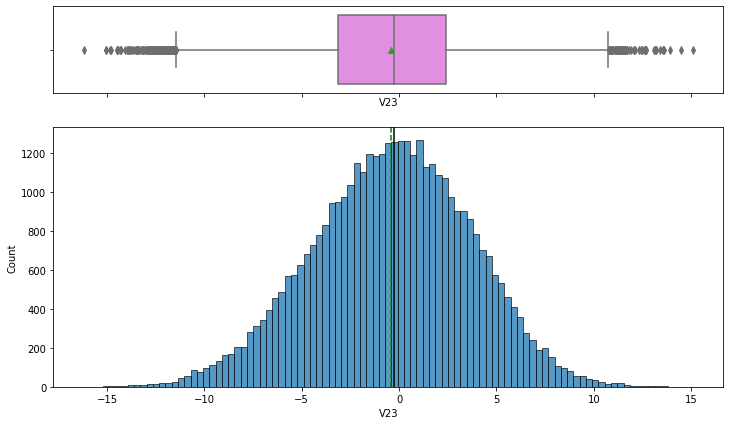

24 . Adjacent Histogram and Boxplot for:  V24
_______________________________________________


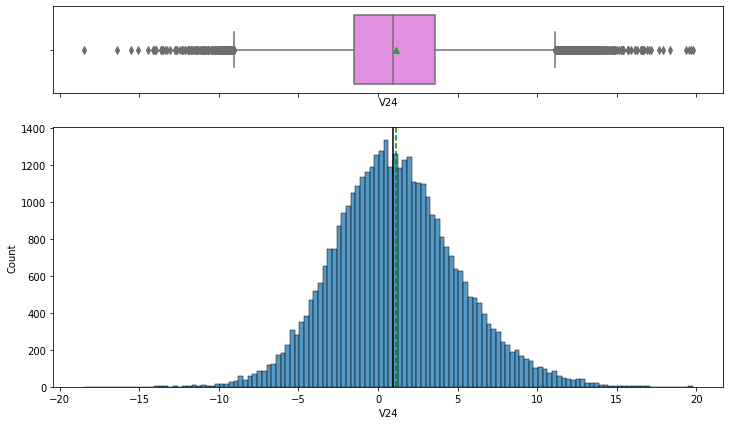

25 . Adjacent Histogram and Boxplot for:  V25
_______________________________________________


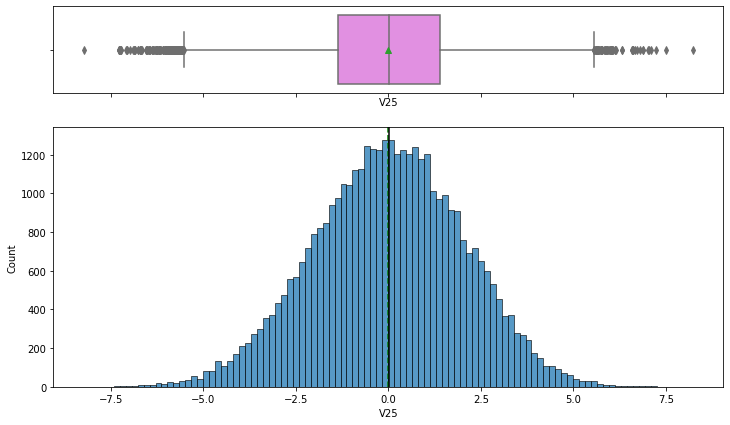

26 . Adjacent Histogram and Boxplot for:  V26
_______________________________________________


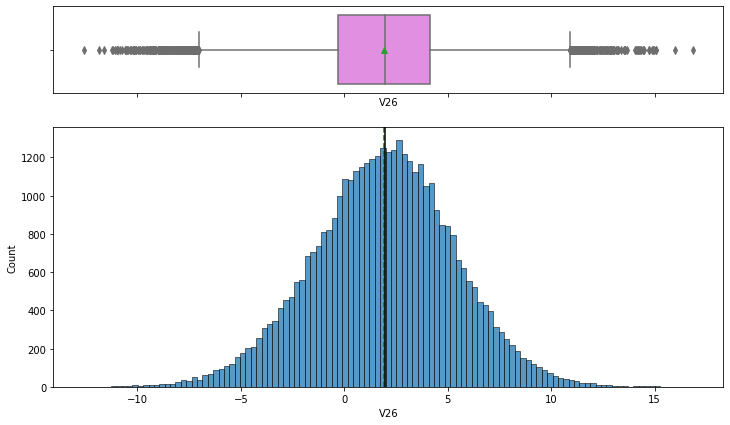

27 . Adjacent Histogram and Boxplot for:  V27
_______________________________________________


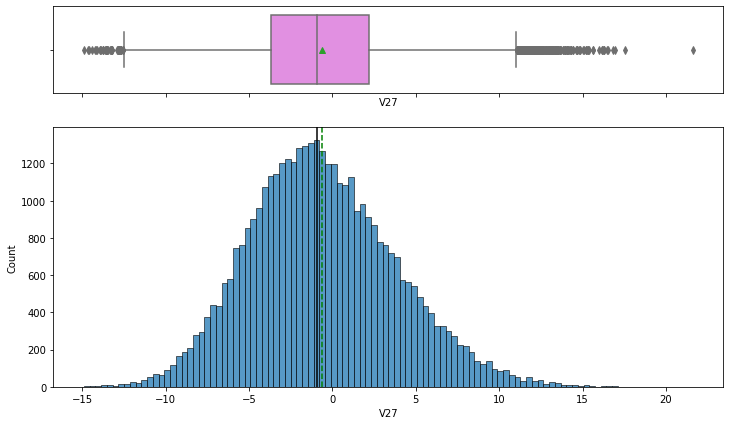

28 . Adjacent Histogram and Boxplot for:  V28
_______________________________________________


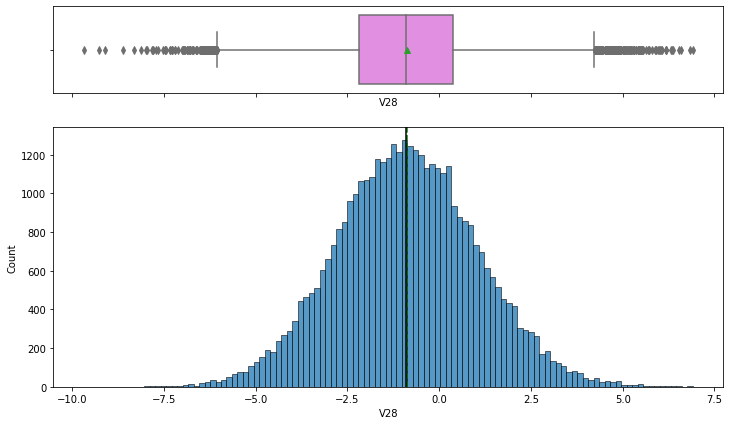

29 . Adjacent Histogram and Boxplot for:  V29
_______________________________________________


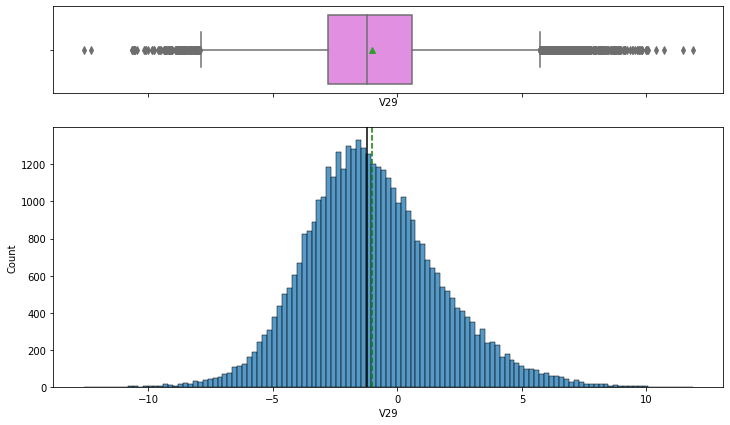

30 . Adjacent Histogram and Boxplot for:  V30
_______________________________________________


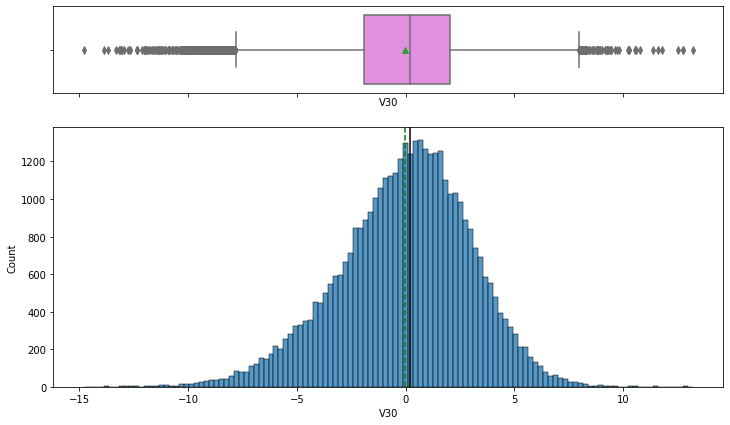

31 . Adjacent Histogram and Boxplot for:  V31
_______________________________________________


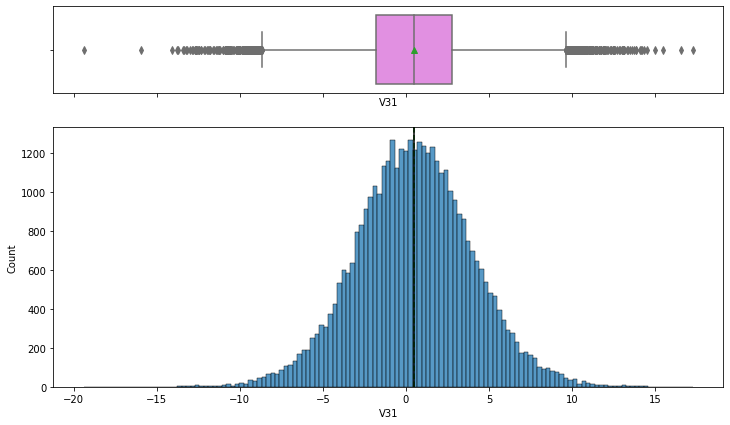

32 . Adjacent Histogram and Boxplot for:  V32
_______________________________________________


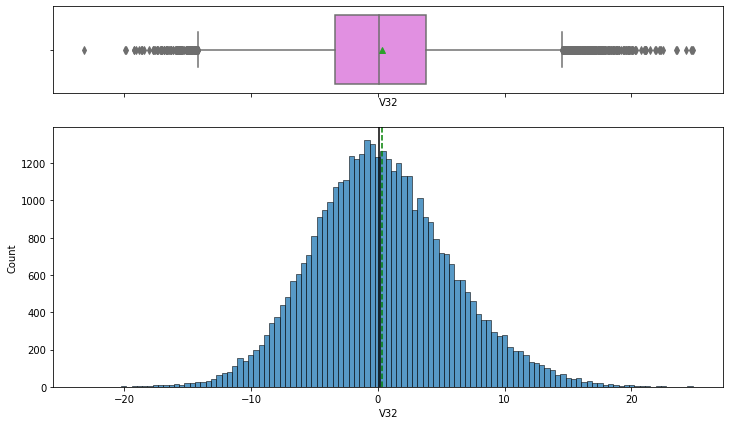

33 . Adjacent Histogram and Boxplot for:  V33
_______________________________________________


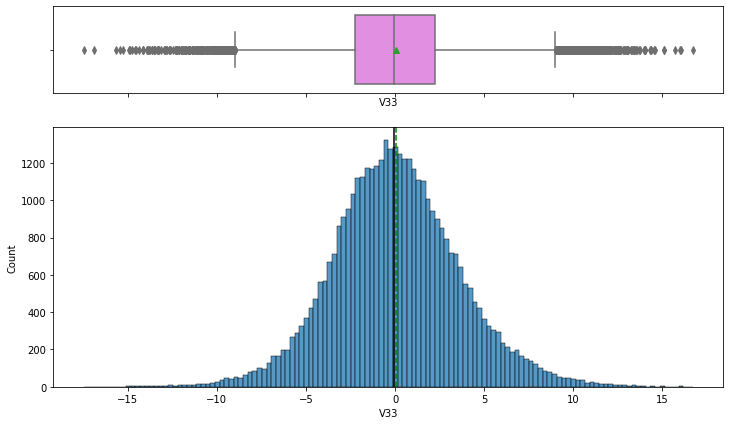

34 . Adjacent Histogram and Boxplot for:  V34
_______________________________________________


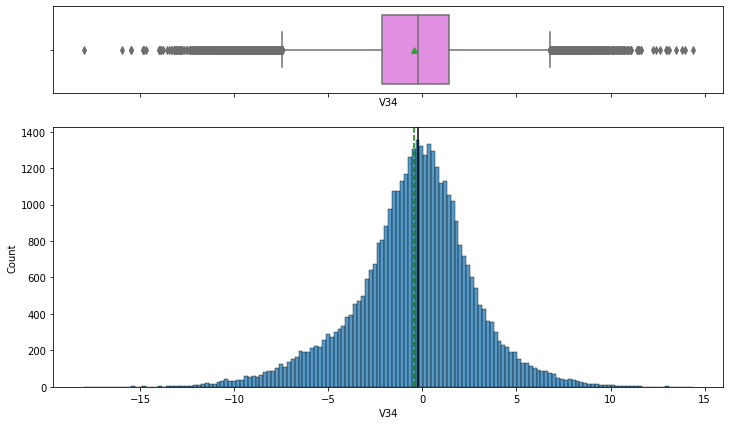

35 . Adjacent Histogram and Boxplot for:  V35
_______________________________________________


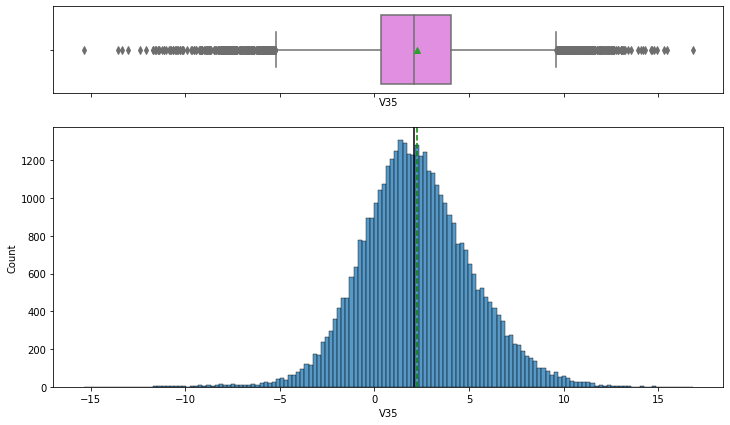

36 . Adjacent Histogram and Boxplot for:  V36
_______________________________________________


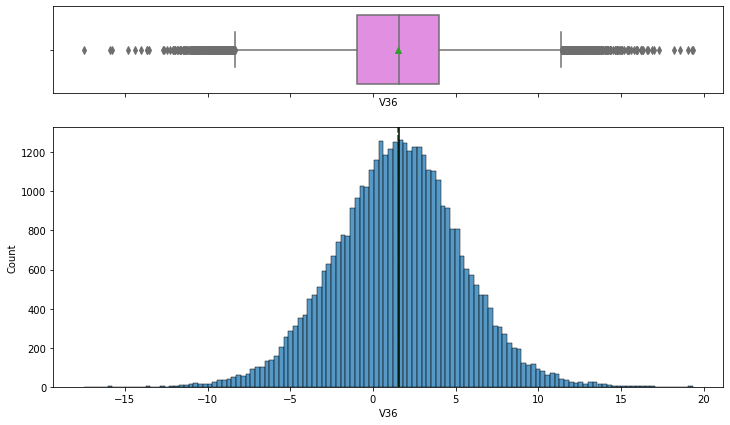

37 . Adjacent Histogram and Boxplot for:  V37
_______________________________________________


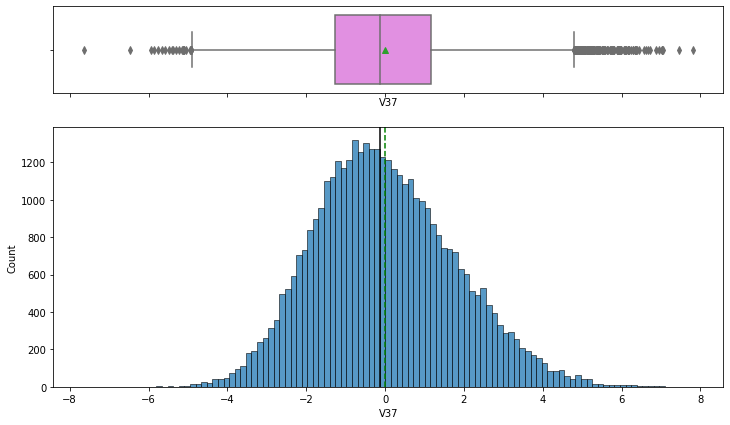

38 . Adjacent Histogram and Boxplot for:  V38
_______________________________________________


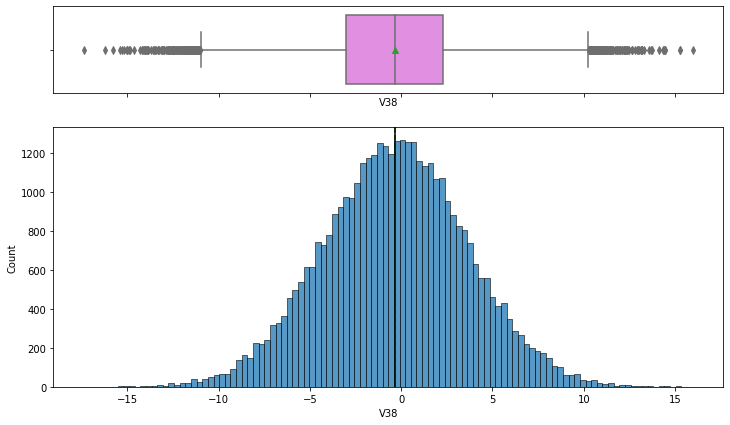

39 . Adjacent Histogram and Boxplot for:  V39
_______________________________________________


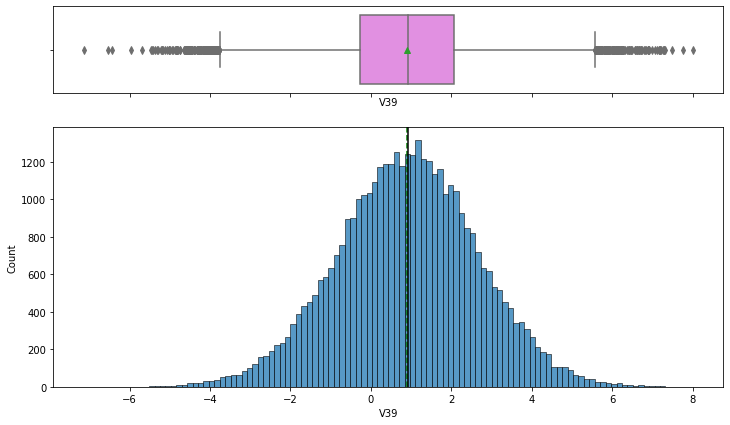

40 . Adjacent Histogram and Boxplot for:  V40
_______________________________________________


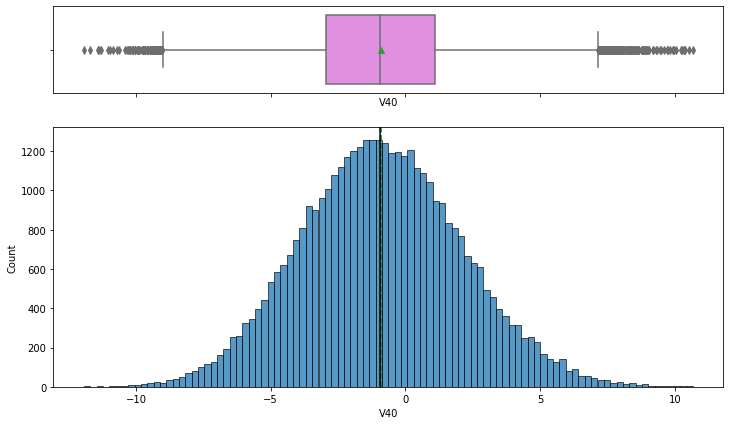

41 . Adjacent Histogram and Boxplot for:  Target
_______________________________________________


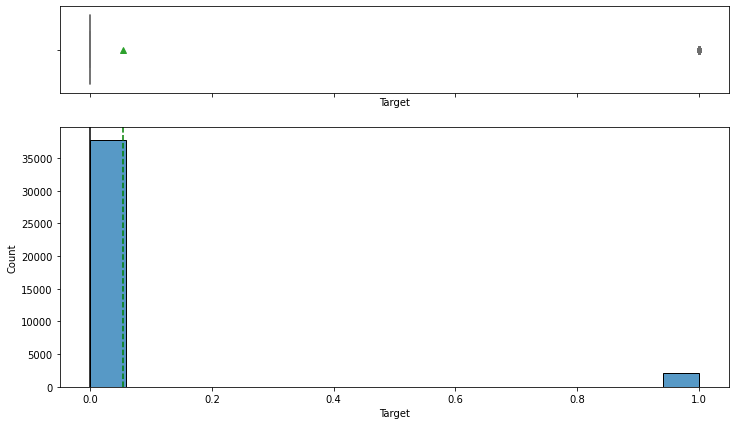

In [16]:
m=1 #initiates tne numerical position of the variable in the table
for j in data_test.columns:
    print( m ,". Adjacent Histogram and Boxplot for: ", j)
    print("_______________________________________________")
    histogram_boxplot(data, j, figsize=(12, 7), kde=False, bins=None)
    m=m+1
    plt.show()

**Observations:**
* All but the traget variable have a quasi-normal distribution; with the majority centered around zero
* The target variable is haved biased towards zero, whith the zero count>9 thousands while the 1 count is a few hundreds

### Let's analyze further the point from our second observation above ###

In [17]:
grouped_data=data.groupby("Target")["Target"].count() 

In [18]:
grouped_data

Target
0    37813
1     2187
Name: Target, dtype: int64

In [19]:
grouped_data_test=data_test.groupby("Target")["Target"].count() 
grouped_data_test

Target
0    9453
1     547
Name: Target, dtype: int64

## 5. Data Engineering before Building Models

5.1. Dividing data into x and y

In [20]:
y = data["Target"]
X = data.drop(["Target"], axis=1)
y_test = data_test["Target"]
X_test = data_test.drop(["Target"], axis=1) 

5.2. Splitting data into train, test and validation set

In [21]:
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.25,random_state=1) 
print(X_train.shape, X_val.shape, X_test.shape)

(30000, 40) (10000, 40) (10000, 40)


We now have the validation set and a test set. To avaid data leak, we must not touch the test data until the final stage

Recall, earlier, we observed that the data had some missing values. Let's use the sklearn imputer's simpleImputer to fill in the missing values with the median

In [22]:
imputer = SimpleImputer(strategy="median")

In [23]:
# Fit and transform the train data
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)

# Transform the validation data
X_val =  imputer.transform(X_val) 

# Transform the test data
X_test = imputer.transform(X_test) 

In [24]:
X_train.isnull().sum()

V1     0
V2     0
V3     0
V4     0
V5     0
V6     0
V7     0
V8     0
V9     0
V10    0
V11    0
V12    0
V13    0
V14    0
V15    0
V16    0
V17    0
V18    0
V19    0
V20    0
V21    0
V22    0
V23    0
V24    0
V25    0
V26    0
V27    0
V28    0
V29    0
V30    0
V31    0
V32    0
V33    0
V34    0
V35    0
V36    0
V37    0
V38    0
V39    0
V40    0
dtype: int64

In [25]:
np.isnan(X_val).any()

False

In [26]:
np.isnan(X_test).any()

False

Clearly, all the null values have been imputed

## 6. Model selection and Criterions ###

Since we want to predict with the generarations will fail or not, we want to use a classification approach.

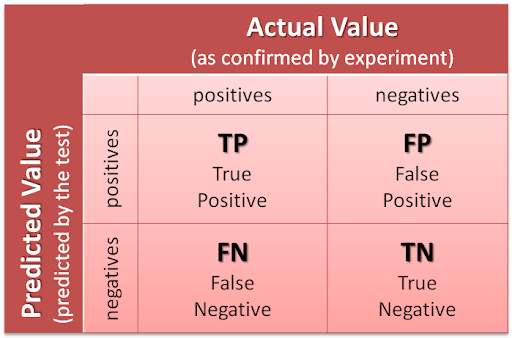

The above confusion matrix shows us possible outcomes of a classification model, in our cases of predicting generators failure:
- True positives (TP) will refer to generators failures we are are able to accurately predict
- When we failt to detect/predict a failure with it has indeed occured, we will label it as false negatives
- On the contrary, if we incorrectly predict a failure while there's none, we will call it false positives

Our task as data scientists and business analysts is to predict the failures before they occuer, therefore we need to optimize true positives, we can achive this by minimizing false negatives-- we dont want a failure to appear when we are not aware becuase this will lead to higher maintenance cost which could have been avaided by fixing the generator before the failure occurs

**Lets reuse the function from earlier exercies that returns metrics**

In [27]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1
        },
        index=[0],
    )

    return df_perf

In [28]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [29]:
# Let's set the scorer to recall to maximize recall, since we want to reduce false negatives
scorer = metrics.make_scorer(metrics.recall_score)

## 7. Model Building ##

### 7.1 Model Building Using the Ogiginal Data

In [ ]:
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Cross-Validation Cost:

Logistic regression: 0.47580547112462
Bagging: 0.7190881458966565
Random Forest: 0.7615529151699365
Adaboost: 0.6074587823523994
Gradient Boost: 0.7203094777562863

Validation Performance:

Logistic regression: 0.4805194805194805


Let's do some data transformation before applying the same steps using XGBoost

In [ ]:
#realign the columns names of the train dataframe and test dataframe using

y_val = y_val[X_val.]
#save the model first and then load the model

#change the test data into array before feeding into the model:

y_val=y_val.values

In [ ]:
#Let's the same steps for XGBoost 
models = []  # Empty list to store all the models

# Appending models into the list
models.append(("XGB Classifier", XGBClassifier(random_state=1)))

results2 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results2.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


In [ ]:
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with oversampled data

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After OverSampling, counts of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, counts of label '0': {} \n".format(sum(y_train_over == 0)))


print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

In [ ]:
#Complete the code to build models on oversampled data 

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


In [ ]:
#Plotting boxplots for CV scores of all models defined above
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

### Model Building with undersampled data

In [ ]:
rus = RandomUnderSampler(random_state=1, sampling_strategy=1)
X_train_un, y_train_un = rus.fit_resample(X_train, y_train)


print("Before UnderSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before UnderSampling, counts of label '0': {} \n".format(sum(y_train == 0)))


print("After UnderSampling, counts of label '1': {}".format(sum(y_train_un == 1)))
print("After UnderSampling, counts of label '0': {} \n".format(sum(y_train_un == 0)))


print("After UnderSampling, the shape of train_X: {}".format(X_train_un.shape))
print("After UnderSampling, the shape of train_y: {} \n".format(y_train_un.shape))

In [ ]:
# Complete the code to build models on undersampled data 
#Complete the code to build models on oversampled data 

models = []  # Empty list to store all the models

# Appending models into the list
models.append(("Logistic regression", LogisticRegression(random_state=1)))
models.append(("Bagging", BaggingClassifier(random_state=1)))
models.append(("Random Forest", RandomForestClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("Gradient Boost", GradientBoostingClassifier(random_state=1)))

results1 = []  # Empty list to store all model's CV scores
names = []  # Empty list to store name of the models


# loop through all models to get the mean cross validated score
print("\n" "Cross-Validation Cost:" "\n")

for name, model in models:
    kfold = StratifiedKFold(
        n_splits=5, shuffle=True, random_state=1
    )  # Setting number of splits equal to 5
    cv_result = cross_val_score(
        estimator=model, X=X_train, y=y_train, scoring=scorer, cv=kfold
    )
    results1.append(cv_result)
    names.append(name)
    print("{}: {}".format(name, cv_result.mean()))

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))

In [ ]:
# Plotting boxplots for CV scores of all models defined above
# Plotting boxplots for CV scores of all models defined above
fig = plt.figure(figsize=(10, 7))

fig.suptitle("Algorithm Comparison")
ax = fig.add_subplot(111)

plt.boxplot(results1)
ax.set_xticklabels(names)

plt.show()

**After looking at performance of all the models, let's decide which models can further improve with hyperparameter tuning.**

**Note**: You can choose to tune some other model if XGBoost gives error.

## Hyperparameter Tuning

### Tuning Bagging classifier using oversampled data

In [ ]:
%%time 

# defining model
Model = BaggingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
              'max_samples': [0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9],
              'n_estimators' : [30,50,70],
             }


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_bag2 = BaggingClassifier(
    max_features=0.9, random_state=1, max_samples=0.9, n_estimators=50
)

tuned_bag2.'_______' ## Complete the code to fit the model on over sampled data

In [ ]:
bag2_train_perf = model_performance_classification_sklearn(tuned_bag2, X_train, y_train)
bag2_train_perf

In [ ]:
bag2_val_perf = '_______' ## Complete the code to check the performance on validation set
bag2_val_perf

### Tuning Random forest using oversampled data

In [ ]:
%%time 

# defining model
Model = RandomForestClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators": [200,250,300],
    "min_samples_leaf": np.arange(1, 4),
    "max_features": [np.arange(0.3, 0.6, 0.1),'sqrt'],
    "max_samples": np.arange(0.4, 0.7, 0.1)}


#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_rf2 = RandomForestClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.5000000000000001,
    n_estimators=250,
    min_samples_leaf=1,
)

tuned_rf2.'_______' ## Complete the code to fit the model on over sampled data

In [ ]:
rf2_train_perf = '_______' ## Complete the code to check the performance on oversampled train set
rf2_train_perf

In [ ]:
rf2_val_perf = '_______' ## Complete the code to check the performance on validation set
rf2_val_perf

### Tuning Gradient Boosting using oversampled data

In [ ]:
%%time 

# defining model
Model = GradientBoostingClassifier(random_state=1)

#Parameter grid to pass in RandomSearchCV
param_grid={"n_estimators": np.arange(100,150,25), "learning_rate": [0.2, 0.05, 1], "subsample":[0.5,0.7], "max_features":[0.5,0.7]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, scoring=scorer, n_iter=50, n_jobs = -1, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over, y_train_over)

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
# Creating new pipeline with best parameters
tuned_gbm = GradientBoostingClassifier(
    max_features="sqrt",
    random_state=1,
    max_samples=0.5000000000000001,
    n_estimators=250,
    min_samples_leaf=1,
)

tuned_gbm.fit(X_train_over, y_train_over)

In [ ]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

In [ ]:
gbm_train_perf = model_performance_classification_sklearn(
    tuned_gbm, X_train_over, y_train_over
)
gbm_train_perf

### Tuning XGBoost using oversampled data

In [ ]:
%%time 

# defining model
Model = XGBClassifier(random_state=1,eval_metric='logloss')

#Parameter grid to pass in RandomSearchCV
param_grid={'n_estimators':[150,200,250],'scale_pos_weight':[5,10], 'learning_rate':[0.1,0.2], 'gamma':[0,3,5], 'subsample':[0.8,0.9]}

#Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model, param_distributions=param_grid, n_iter=50, n_jobs = -1, scoring=scorer, cv=5, random_state=1)

#Fitting parameters in RandomizedSearchCV
randomized_cv.'_______' ## Complete the code to fit the model on over sampled data

print("Best parameters are {} with CV score={}:" .format(randomized_cv.best_params_,randomized_cv.best_score_))

In [ ]:
xgb2 = XGBClassifier(
    random_state=1,
    eval_metric="logloss",
    subsample=0.9,
    scale_pos_weight=5,
    n_estimators=250,
    learning_rate=0.2,
    gamma=0,
)

xgb2.'_______' ## Complete the code to fit the model on over sampled data

In [ ]:
xgb2_train_perf =  '_______' ## Complete the code to check the performance on oversampled train set
xgb2_train_perf

In [ ]:
xgb2_val_perf =  '_______' ## Complete the code to check the performance on validation set
xgb2_val_perf

**We have now tuned all the models, let's compare the performance of all tuned models and see which one is the best.**

## Model Performance comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        gbm_train_perf.T,
        xgb2_train_perf.T,
        bag2_train_perf.T,
        rf2_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Gradient Boosting tuned with oversampled data",
    "XGBoost tuned with oversampled data",
    "Bagging classifier tuned with oversampled data",
    "Random forest tuned with oversampled data",
]
print("Training performance comparison:")
models_train_comp_df

In [ ]:
# validation performance comparison

'_______' ## Write the code to compare the performance on validation set

**Now we have our final model, so let's find out how our model is performing on unseen test data.**

In [ ]:
# Let's check the performance on test set
'_______' ## Write the code to check the performance of best model on test data

### Feature Importances

In [ ]:
feature_names = X_train.columns
importances =  '_______' ## Complete the code to check the feature importance of the best model
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Let's use Pipelines to build the final model

- Since we have only one datatype in the data, we don't need to use column transformer here

In [ ]:
Model = Pipeline('_______' ) ## Complete the code to create pipeline for the best model

In [ ]:
# Separating target variable and other variables
X1 = data.drop(columns="Target")
Y1 = data["Target"]

# Since we already have a separate test set, we don't need to divide data into train and test

X_test1 = df_test.'_______' ##  Complete the code to drop target variable from test data
y_test1 = df_test.'_______' ##  Complete the code to store target variable in y_test1


In [ ]:
# We can't oversample data without doing missing value treatment, so let's first treat the missing values in the train set
imputer = SimpleImputer(strategy="median")
X1 = imputer.fit_transform(X1)

# let's treat the missing values in the test set
X2 = '_______' ##  Complete the code to treat the missing values in the test set

In [ ]:
# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)
X_over1, y_over1 = sm.fit_resample(X1, Y1)

In [ ]:
Model.'_______' ##  Complete the code to fit the Model obtained from above step

In [ ]:
Model.'_______' ##  Complete the code to make predictions on the test data using the productionized Model

# Business Insights and Conclusions


***